# Visualize speed-dependent locomotion results

### Brandon Pratt, Updated 04/24/2023

Goal: visualize kinematic parameters as a function of walking speed and heading angle

### import python libraries

In [1]:
# python libraries
import os
from os import listdir
from os.path import isfile, join
import math

%matplotlib inline
import matplotlib.pyplot as plt
import ptitprince as pt
import matplotlib.colors as colors
import matplotlib.patches as  mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import seaborn as sea
from scipy import interpolate
from scipy.stats import vonmises
from scipy.stats import iqr
from scipy.stats import mode
from scipy import stats
from scipy.stats import norm, lognorm, gamma, powerlaw, pearsonr
from sklearn.metrics import r2_score
from matplotlib.cbook import boxplot_stats


### load kinematic results

#### Load in Linear Treadmill data

In [2]:
genotype = 'wt_berlin'
genotype_plot_name = 'WT Berlin'
results_dir = 'C:/Users/pratt/Desktop/Analysis/LINEAR_BELT_RESULTS/results/'

# use for all wt berlin flies
# figure_dir = 'H:/.shortcut-targets-by-id/10pxdlRXtzFB-abwDGi0jOGOFFNm3pmFK/Tuthill Lab Shared/Brandon/Analysis/LINEAR_BELT_RESULTS/figures/'

# use for subset of wt berlin flies
figure_dir = 'H:/.shortcut-targets-by-id/10pxdlRXtzFB-abwDGi0jOGOFFNm3pmFK/Tuthill Lab Shared/Brandon/Analysis/LINEAR_BELT_RESULTS/figures_subset_flies/'

# meta variables
meta_matrix = np.load(results_dir + genotype + '_meta_matrix.npy', allow_pickle=True)
beh_class = np.load(results_dir + genotype + '_behavior_classification.npy', allow_pickle=True)
swing_stance_mat_posture = np.load(results_dir + genotype + '_swing_stance_matrix_posture.npy', allow_pickle=True)
swing_stance_mat_walking = np.load(results_dir + genotype + '_swing_stance_matrix_walking.npy', allow_pickle=True)

# body kinematics 
heading_angle = np.load(results_dir + genotype + '_heading_angle.npy', allow_pickle=True)
total_vel = np.load(results_dir + genotype + '_total_velocity.npy', allow_pickle=True)
parallel_vel = np.load(results_dir + genotype + '_parallel_velocity.npy', allow_pickle=True)
perpendiular_vel = np.load(results_dir + genotype + '_perpendicular_velocity.npy', allow_pickle=True)
position_prob = np.load(results_dir + genotype + '_position_probability.npy', allow_pickle=True)

# posture variables 
body_height_posture = np.load(results_dir + genotype + '_body_height_posture.npy', allow_pickle=True)
body_height_walking = np.load(results_dir + genotype + '_body_height_walking.npy', allow_pickle=True)
body_pitch = np.load(results_dir + genotype + '_body_pitch.npy', allow_pickle=True)
body_angle = np.load(results_dir + genotype + '_body_angle.npy', allow_pickle=True)
polygon_area_posture = np.load(results_dir + genotype + '_polygon_area_posture.npy', allow_pickle=True)
polygon_area_walking = np.load(results_dir + genotype + '_polygon_area_walking.npy', allow_pickle=True)
static_stability_posture = np.load(results_dir + genotype + '_static_stability_posture.npy', allow_pickle=True)
static_stability_walking = np.load(results_dir + genotype + '_static_stability_walking.npy', allow_pickle=True)

# spatial kinematics
aepx = np.load(results_dir + genotype + '_AEPx.npy', allow_pickle=True)
aepy = np.load(results_dir + genotype + '_AEPy.npy', allow_pickle=True)
pepx = np.load(results_dir + genotype + '_PEPx.npy', allow_pickle=True)
pepy = np.load(results_dir + genotype + '_PEPy.npy', allow_pickle=True)
swing_height = np.load(results_dir + genotype + '_swing_height.npy', allow_pickle=True)
swing_linearity = np.load(results_dir + genotype + '_swing_linearity.npy', allow_pickle=True)
stance_distance = np.load(results_dir + genotype + '_stance_distance.npy', allow_pickle=True)
swing_distance = np.load(results_dir + genotype + '_swing_distance.npy', allow_pickle=True)
limb_positions = np.load(results_dir + genotype + '_limb_positions.npy', allow_pickle=True)
body_positions = np.load(results_dir + genotype + '_body_positions.npy', allow_pickle=True)

# temporal kinematics 
step_freq = np.load(results_dir + genotype + '_step_frequency.npy', allow_pickle=True)
stance_duration = np.load(results_dir + genotype + '_stance_duration.npy', allow_pickle=True)
swing_duration = np.load(results_dir + genotype + '_swing_duration.npy', allow_pickle=True)
duty_factor = np.load(results_dir + genotype + '_duty_factor.npy', allow_pickle=True)
step_speed = np.load(results_dir + genotype + '_step_speed.npy', allow_pickle=True)
stance_speed = np.load(results_dir + genotype + '_stance_speed.npy', allow_pickle=True)
swing_speed = np.load(results_dir + genotype + '_swing_speed.npy', allow_pickle=True)

# interlimb coordination parameters 
phase = np.load(results_dir + genotype + '_phase.npy', allow_pickle=True)
relative_distance = np.load(results_dir + genotype + '_relative_distance.npy', allow_pickle=True)
relative_stance_onset = np.load(results_dir + genotype + '_relative_stance_onset.npy', allow_pickle=True)
nlegs_stance_posture = np.load(results_dir + genotype + '_number_legs_in_stance_posture.npy', allow_pickle=True)
nlegs_stance_walking = np.load(results_dir + genotype + '_number_legs_in_stance_walking.npy', allow_pickle=True)
duration_nlegs = np.load(results_dir + genotype + '_legs_in_stance_duration.npy', allow_pickle=True)
left_tcs = np.load(results_dir + genotype + '_left_tcs.npy', allow_pickle=True)
right_tcs = np.load(results_dir + genotype + '_right_tcs.npy', allow_pickle=True)

### Plot heading angle distribution

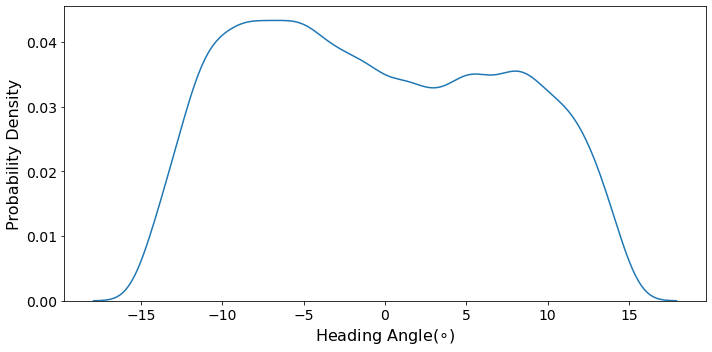

In [3]:
fig = plt.figure(figsize = [10,5])
sea.kdeplot(data=heading_angle.flatten()[beh_class.flatten() == 1])
plt.ylabel('Probability Density', fontsize = 16)
plt.xlabel('Heading Angle($\circ$)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.show()

### Plot Velocity Distribution

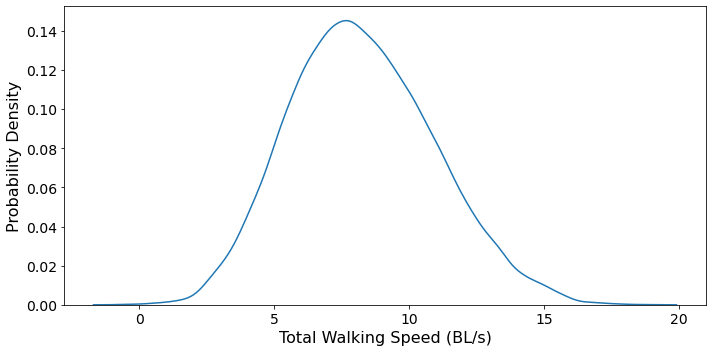

In [4]:
fig = plt.figure(figsize = [10,5])
sea.kdeplot(data=total_vel.flatten()[beh_class.flatten() == 1])
plt.ylabel('Probability Density', fontsize = 16)
plt.xlabel('Total Walking Speed (BL/s)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()
plt.show()

### Speed-dependent body kinematics

In [3]:
driving_speeds = np.unique(meta_matrix[:, 2]).tolist()
flies = np.unique(meta_matrix[:, 0]).astype(int).tolist()[0:10]
walking_speed_dists = []
walking_speed_stats = np.zeros((len(flies), len(driving_speeds))) 
d_cnt = -1
for j in driving_speeds:
    d_cnt += 1
    for fly in flies:
        fly_idxs = meta_matrix[:, 0] == fly
        driving_speed_idxs = meta_matrix[:, 2] == j
        trial_idxs = np.logical_and.reduce((fly_idxs, driving_speed_idxs))
        
        # velocities and forward walking
        vels = parallel_vel[trial_idxs,:].flatten()
        beh_ids = beh_class[trial_idxs, :].flatten()
        
        fw_vels = vels[beh_ids==1]
        
        # filter our nans
        filt_fw_vels = fw_vels[~np.isnan(fw_vels)]
        
        # compute stats
        walking_speed_stats[fly-1, d_cnt] = np.nanmedian(filt_fw_vels)
        
        # store distribution data
        if fly ==1:
            vel_dist = filt_fw_vels
        else:
            vel_dist = np.concatenate((vel_dist, filt_fw_vels))
            
    walking_speed_dists.append(vel_dist)
        

C:\Users\pratt\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


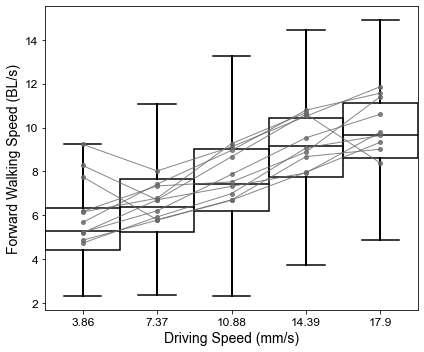

In [4]:
# plot driving speed by walking speed
fig = plt.figure(1, figsize = [6,5])
# plot box plot
sea.boxplot(data = walking_speed_dists, color = "black", width = 1, zorder = 1,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":1},\
showfliers=False, whiskerprops = {'linewidth':2, "zorder":1},\
saturation = 1)

for j in range(walking_speed_stats.shape[0]):
    plt.plot(np.arange(0,len(driving_speeds)), walking_speed_stats[j,:], color ='dimgray', marker='.', markersize = 8, linewidth = 1, alpha = 0.8)
    
# axis properties
plt.yticks(fontsize = 12, fontname = 'Arial')
plt.xticks(np.arange(len(driving_speeds)), np.array(driving_speeds).astype(str), fontsize = 12, rotation = 0, fontname="Arial")
plt.xlabel('Driving Speed (mm/s)', fontsize = 14, fontname = 'Arial')
plt.ylabel('Forward Walking Speed (BL/s)', fontsize = 14, fontname = 'Arial')

plt.tight_layout()
plt.show()

fig.savefig(figure_dir + 'driving_walking_speed'+'.png', dpi = 200)
fig.savefig(figure_dir + 'driving_walking_speed'+'.pdf', dpi = 200)

#### 2D pdf of heading angle and forward walking speed

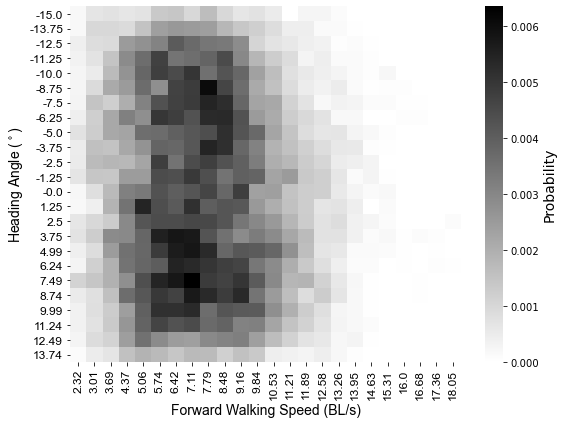

In [11]:
# body kinematics
speed_dist = parallel_vel[meta_matrix[:,0] <11,:].flatten() # only look at a subset of flies
heading_angle_dist = heading_angle[meta_matrix[:,0] <11,:].flatten()
beh_ids = beh_class[meta_matrix[:,0] <11,:].flatten()

# isolate forward walking
fw_heading = heading_angle_dist[beh_ids==1]
fw_vel = speed_dist[beh_ids==1]

# edges of distributions
vel_bins = 25
heading_bins = 25
vel_grid = np.linspace(np.min(fw_vel), np.max(fw_vel), vel_bins)
vel_center = np.around(vel_grid[1::] - (vel_grid[1]-vel_grid[0]),2)
heading_grid = np.linspace(np.min(fw_heading), np.max(fw_heading), heading_bins)
heading_center = np.around(heading_grid[1::] - (heading_grid[1]-heading_grid[0]),2)

vel_heading_dist = np.zeros((len(heading_center), len(vel_center)))
for j in range(len(heading_center)):
    heading_class = np.logical_and(fw_heading>=heading_grid[j], fw_heading<=heading_grid[j+1])
    
    for i in range(len(vel_center)):
        vel_class = np.logical_and(fw_vel>=vel_grid[i], fw_vel<=vel_grid[i+1])
        vel_heading_dist[j,i] = len(np.where(np.logical_and.reduce((heading_class, vel_class))==True)[0])

vel_heading_dist = vel_heading_dist/np.sum(vel_heading_dist)

# plot 2D distribution  
fig = plt.figure(1, figsize = [8,6])
# ax = sea.heatmap(vel_heading_dist, xticklabels = heading_center, yticklabels=vel_center, cmap='binary')
ax = sea.heatmap(vel_heading_dist, yticklabels = heading_center, xticklabels=vel_center, cmap='binary')
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.set_label(label = 'Probability', size=14)
plt.xlabel('Forward Walking Speed (BL/s)', fontsize =14, fontname = 'Arial')
plt.ylabel('Heading Angle ($^\circ$)', fontsize =14, fontname = 'Arial')
plt.yticks(fontsize = 12, fontname = 'Arial')
plt.xticks(fontsize = 12, fontname = 'Arial')
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + 'heading_speed_dist'+'.png', dpi = 200)
fig.savefig(figure_dir + 'heading_speed_dist'+'.pdf', dpi = 200)

#### 1D body kinematics, posture, and interlimb coordination 

In [12]:
def one_dimensional_metrics(metric, w_vel, meta_matrix, beh_class):
    dist_cnt = 0
    for fly in np.unique(meta_matrix[:, 0]).astype(int).tolist()[0:10]: #[0:10] - select the data of the first 10 flies
        trial_idxs = np.where(meta_matrix[:, 0] == fly)[0]

        # extract data
        vel_data = w_vel[trial_idxs,:].flatten()
        metric_data = metric[trial_idxs,:].flatten() # doesn't need to be transposed

        # behavior classifier
        beh_ids = beh_class[trial_idxs, :].flatten()

        # filter for forward walking behavior == 1
        fw_vel_data = vel_data[beh_ids==1]
        fw_metric_data = metric_data[beh_ids==1]

        # filter concatenated data to remove Nans
        filter_vels = fw_vel_data[~np.isnan(fw_metric_data)]
        filter_data  = fw_metric_data[~np.isnan(fw_metric_data)]

        # filter out -1 values
        filter_vels = filter_vels[~(filter_data ==-1)]
        filter_data = filter_data[~(filter_data ==-1)]
        
        # filter out zero values
        filter_vels = filter_vels[~(filter_data ==0)]
        filter_data = filter_data[~(filter_data ==0)]

        # if there are a sufficient number of steps then store data as a distribution
        if dist_cnt == 0:
            data_dist = filter_data
            vel_dist = filter_vels
            fly_dist = fly*np.ones(len(filter_data))
            dist_cnt = 1
        else:
            data_dist = np.concatenate((data_dist, filter_data))
            vel_dist = np.concatenate((vel_dist, filter_vels))
            fly_dist = np.concatenate((fly_dist, fly*np.ones(len(filter_data))))

    # stack data
    all_data = np.vstack((fly_dist, vel_dist, data_dist))
    
    return all_data

In [13]:
# get distribution data
w_vel = parallel_vel

# ALL 1D kinemtic, coordination, and posture parameters
body_height_dist = one_dimensional_metrics(-body_height_walking, w_vel, meta_matrix, beh_class)
nlegs_stance_dist = one_dimensional_metrics(nlegs_stance_walking, w_vel, meta_matrix, beh_class)
body_pitch_dist = one_dimensional_metrics(body_pitch, w_vel, meta_matrix, beh_class)
body_angle_dist = one_dimensional_metrics(body_angle, w_vel, meta_matrix, beh_class)
polygon_area_dist = one_dimensional_metrics(polygon_area_walking, w_vel, meta_matrix, beh_class)
static_stability_dist = one_dimensional_metrics(static_stability_walking, w_vel, meta_matrix, beh_class)

In [14]:
def plot_1D_metrics(plot_metric, ylabel_name, fig_name, p_coeff):
    # plot 1D metrics
    fig = plt.figure(1, figsize =[5,5])

    # plot scatter plot
    plt.scatter(plot_metric[1,:], plot_metric[2,:], color = 'darkgray', s = 5, alpha = 1)

    # fly-specific fits

    unique_flies = np.unique(plot_metric[0,:]).tolist()#[0:10]
    for fly in unique_flies:
        fly_idxs = np.where(plot_metric[0,:]==fly)[0] 
        vel_fit = np.linspace(np.min(plot_metric[1,fly_idxs]), np.max(plot_metric[1,fly_idxs]), 100)
        p = np.polyfit(plot_metric[1,fly_idxs], plot_metric[2,fly_idxs], p_coeff) # estimated coefficents...least squares polynomial fit
        y_fit = np.polyval(p, vel_fit)
        plt.plot(vel_fit, y_fit, color = 'dimgray', linewidth = 1, alpha =1)

    # global fits
    n_frames = len(plot_metric[1,:])
    vel_fit = np.linspace(np.min(plot_metric[1,:]), np.max(plot_metric[1,:]), 100)
    p = np.polyfit(plot_metric[1,:], plot_metric[2,:], p_coeff) # estimated coefficents...least squares polynomial fit
    y_fit = np.polyval(p, vel_fit)
    r2_val = np.around(r2_score(plot_metric[2,:], np.polyval(p, plot_metric[1,:])),2)
    plt.plot(vel_fit, y_fit, color = 'black', linewidth = 2.5, alpha =0.8)

    # legend
#     plt.text(0.55, 0.9, '$R^{2}$ =' + str(r2_val), horizontalalignment='center',verticalalignment='center',transform = ax.transAxes, fontsize = 14, fontname ='Arial')
    plt.title('$R^{2}$ =' + str(r2_val), fontsize = 16)
    plt.yticks(fontsize=12, fontname ='Arial')
    plt.xticks(fontsize=12, fontname ='Arial')
    plt.xlabel('Forward Walking Speed (BL/s)', fontsize=14, fontname ='Arial')
    plt.ylabel(ylabel_name, fontsize=14, fontname ='Arial')

    plt.xlim([0,20])
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    fig.savefig(figure_dir + fig_name+'.png', dpi = 200)
    fig.savefig(figure_dir + fig_name+'.pdf', dpi = 200)

In [60]:
# Plots with marginal distrbutions added
def plot_1D_metrics_marginal_dists(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter):
    # plot 1D metrics
    g = sea.JointGrid()

    # scatter
    if plot_scatter:
        sea.scatterplot(x=plot_metric[1,:], y=plot_metric[2,:], color = 'darkgray', s = 5, alpha = 1, ax=g.ax_joint)

    # plot for each fly 
    unique_flies = np.unique(plot_metric[0,:]).tolist()#[0:10]
    for fly in unique_flies:
        fly_idxs = np.where(plot_metric[0,:]==fly)[0] 
        vel_fit = np.linspace(np.min(plot_metric[1,fly_idxs]), np.max(plot_metric[1,fly_idxs]), 100)
        p = np.polyfit(plot_metric[1,fly_idxs], plot_metric[2,fly_idxs], p_coeff) # estimated coefficents...least squares polynomial fit
        y_fit = np.polyval(p, vel_fit)
        sea.lineplot(x=vel_fit, y=y_fit, color = 'dimgray', linewidth = 1, alpha =1, ax=g.ax_joint)

    # global fits
    n_frames = len(plot_metric[1,:])
    vel_fit = np.linspace(np.min(plot_metric[1,:]), np.max(plot_metric[1,:]), 100)
    p = np.polyfit(plot_metric[1,:], plot_metric[2,:], p_coeff) # estimated coefficents...least squares polynomial fit
    y_fit = np.polyval(p, vel_fit)
    r2_val = np.around(r2_score(plot_metric[2,:], np.polyval(p, plot_metric[1,:])),2)
    sea.lineplot(x=vel_fit, y=y_fit, color = 'black', linewidth = 2.5, alpha =1, ax=g.ax_joint)

    # kde propability - speed and metric
    sea.kdeplot(x=plot_metric[1,:], linewidth=2, color = 'black', ax=g.ax_marg_x)
    sea.kdeplot(y=plot_metric[2,:], linewidth=2, color = 'black', ax=g.ax_marg_y)


    # legend
    #     plt.text(0.55, 0.9, '$R^{2}$ =' + str(r2_val), horizontalalignment='center',verticalalignment='center',transform = ax.transAxes, fontsize = 14, fontname ='Arial')
    # g.ax_joint.title('$R^{2}$ =' + str(r2_val), fontsize = 16)
    # g.ax_joint.set_yticks(fontsize=12, fontname ='Arial')
    # g.ax_joint.xticks(fontsize=12, fontname ='Arial')
    g.ax_joint.set_xlabel('Forward Walking Speed (BL/s)', fontsize=14, fontname ='Arial')
    g.ax_joint.set_ylabel(ylabel_name, fontsize=14, fontname ='Arial')
    g.ax_joint.tick_params(axis='both', labelsize=14)
    g.ax_joint.set_title('$R^{2}$ =' + str(r2_val), fontsize = 16)

    g.ax_joint.set_xlim([0,20])
    plt.tight_layout()
    plt.show()

    g.savefig(figure_dir + fig_name+'.png', dpi = 200)
    g.savefig(figure_dir + fig_name+'.pdf', dpi = 200)

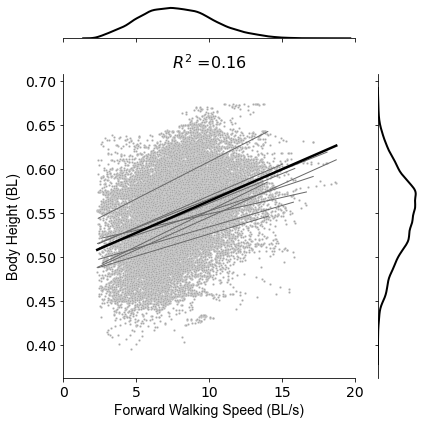

In [61]:
plot_metric = body_height_dist
ylabel_name = 'Body Height (BL)'
fig_name = 'body_height'
p_coeff = 1
plot_scatter = True
plot_1D_metrics_marginal_dists(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

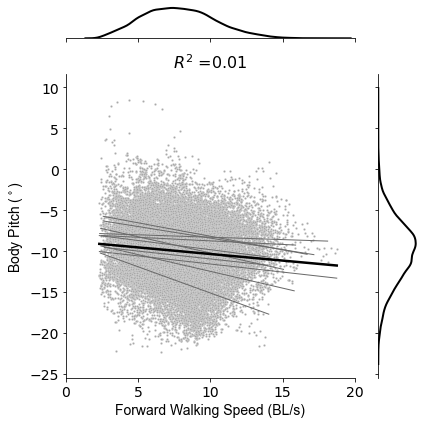

In [62]:
plot_metric = body_pitch_dist
ylabel_name = 'Body Pitch ($^\circ$)'
fig_name = 'body_pitch'
p_coeff = 1
plot_1D_metrics_marginal_dists(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

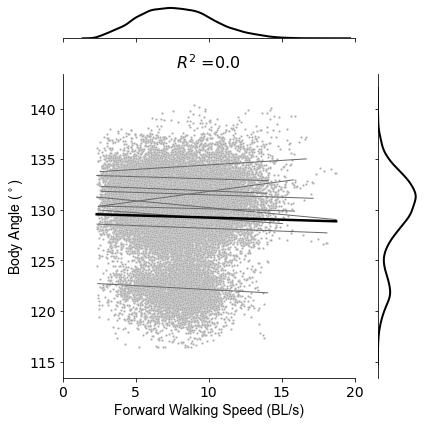

In [63]:
plot_metric = body_angle_dist
ylabel_name = 'Body Angle ($^\circ$)'
fig_name = 'body_angle'
p_coeff = 1
plot_1D_metrics_marginal_dists(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

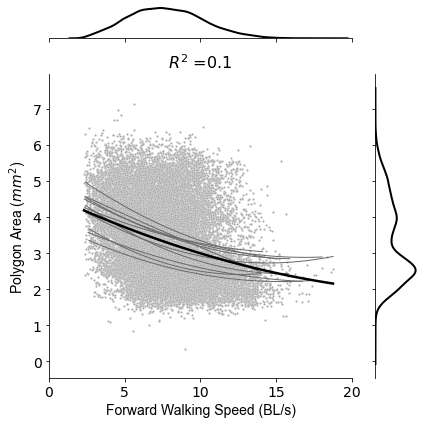

In [64]:
plot_metric = polygon_area_dist
ylabel_name = 'Polygon Area ($mm^2$)'
fig_name = 'polygon_area'
p_coeff = 2
plot_1D_metrics_marginal_dists(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

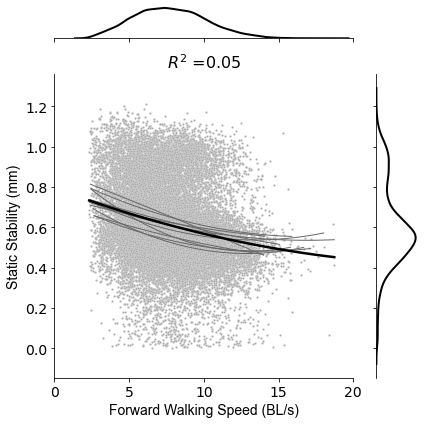

In [65]:
plot_metric = static_stability_dist
ylabel_name = 'Static Stability (mm)'
fig_name = 'static_stability'
p_coeff = 2
plot_1D_metrics_marginal_dists(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

#### Tripod Coordination Strength

In [66]:
metric = left_tcs
metric_2 = right_tcs

dist_cnt = 0
for fly in np.unique(meta_matrix[:, 0]).astype(int).tolist():#[0:10]: # subset of flies
    trial_idxs = np.where(meta_matrix[:, 0] == fly)[0]

    # extract data
    vel_data = w_vel[trial_idxs,:].flatten()
    metric_data = metric[trial_idxs,:].flatten() # doesn't need to be transposed
    metric_2_data = metric_2[trial_idxs,:].flatten() # doesn't need to be transposed

    # behavior classifier
    beh_ids = beh_class[trial_idxs, :].flatten()

    # filter for forward walking behavior == 1
    fw_vel_data = vel_data[beh_ids==1]
    fw_metric_data = metric_data[beh_ids==1]
    fw_metric_2_data = metric_2_data[beh_ids==1]
    
    cat_vel = np.concatenate((fw_vel_data, fw_vel_data))
    cat_data = np.concatenate((fw_metric_data, fw_metric_2_data))

    # filter concatenated data to remove Nans
    filter_vels = cat_vel[~np.isnan(cat_data )]
    filter_data  = cat_data [~np.isnan(cat_data )]

    # filter out -1 values
    filter_vels = filter_vels[~(filter_data ==-1)]
    filter_data = filter_data[~(filter_data ==-1)]

    # filter out zero values
    filter_vels = filter_vels[~(filter_data ==0)]
    filter_data = filter_data[~(filter_data ==0)]

    # if there are a sufficient number of steps then store data as a distribution
    if dist_cnt == 0:
        data_dist = filter_data
        vel_dist = filter_vels
        fly_dist = fly*np.ones(len(filter_data))
        dist_cnt = 1
    else:
        data_dist = np.concatenate((data_dist, filter_data))
        vel_dist = np.concatenate((vel_dist, filter_vels))
        fly_dist = np.concatenate((fly_dist, fly*np.ones(len(filter_data))))

# stack data
TCS_distribution = np.vstack((fly_dist, vel_dist, data_dist))

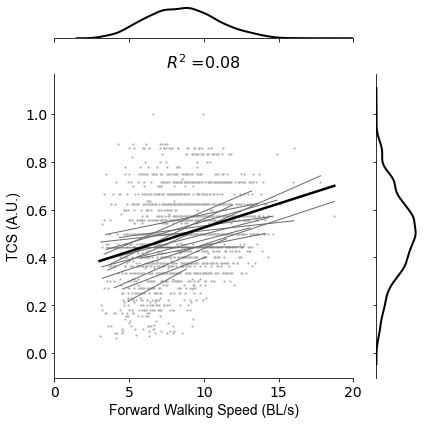

In [67]:
plot_metric = TCS_distribution
ylabel_name = 'TCS (A.U.)'
fig_name = 'tcs'
p_coeff = 1
plot_1D_metrics_marginal_dists(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

#### Number of legs in stance 

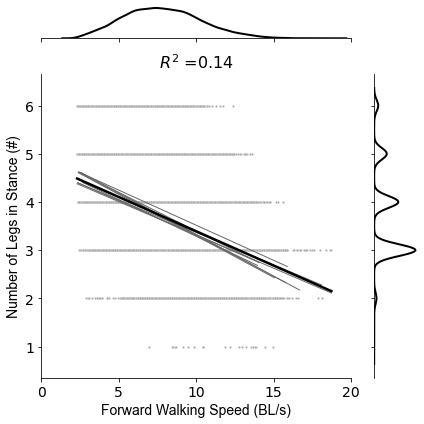

In [69]:
plot_metric = nlegs_stance_dist
ylabel_name = 'Number of Legs in Stance (#)'
fig_name = 'nlegs_stance'
p_coeff = 1
plot_1D_metrics_marginal_dists(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

#### Probability of number of legs in stance

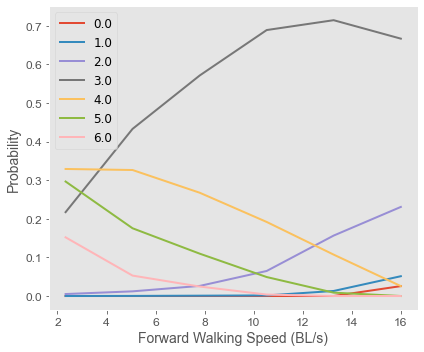

In [175]:
speed_dist = parallel_vel.flatten()
nlegs_dist = nlegs_stance_walking.flatten()

beh_ids = beh_class.flatten()

# isolate forward walking
fw_nlegs = nlegs_dist[beh_ids==1]
fw_vel = speed_dist[beh_ids==1]

# filter nlegs - remove nans
fw_vel = fw_vel[~np.isnan(fw_nlegs)]
fw_nlegs = fw_nlegs[~np.isnan(fw_nlegs)]


# edges of distributions
vel_bins = 7
vel_grid = np.linspace(np.min(fw_vel), np.max(fw_vel), vel_bins)
vel_center = np.around(vel_grid[1::] - (vel_grid[1]-vel_grid[0]),2)
nleg_cat = np.unique(fw_nlegs)

# compute probability distribution for each of the nleg categories
nleg_prob = np.zeros((len(nleg_cat), len(vel_center)))
for j in range(len(nleg_cat)):
    leg_idxs = np.where(fw_nlegs == nleg_cat[j])[0]
    for i in range(len(vel_center)):
        nleg_vels = fw_vel[leg_idxs]
        nleg_prob[j,i] = len(np.where(np.logical_and(nleg_vels>=vel_grid[i], nleg_vels<=vel_grid[i+1])==True)[0])
        
nleg_prob = nleg_prob/np.sum(nleg_prob, axis = 0)


# plot the probability of a certain number of legs in stance
fig = plt.figure(1, figsize = [6,5])
plt.style.use('ggplot')

for j in range(nleg_prob.shape[0]):
    plt.plot(vel_center, nleg_prob[j,:], linewidth =2)

# axis properties
plt.xticks(fontsize = 12, fontname = 'Arial')
plt.yticks(fontsize = 12, fontname = 'Arial')
plt.xlabel('Forward Walking Speed (BL/s)', fontsize = 14, fontname = 'Arial')
plt.ylabel('Probability', fontsize = 14, fontname = 'Arial')

plt.legend(nleg_cat.astype(str), fontsize =12)
plt.grid(False)
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + 'nleg_stance_prob'+'.png', dpi = 200)
fig.savefig(figure_dir + 'nleg_stance_prob'+'.pdf', dpi = 200)

### Speed-dependent intralimb kinematics

- scatter plots with fits - combine leg pairs on the same plot

- only focus on forward walking bouts

In [74]:
def intralimb_kinematic_distrbutions(metric, w_vel, n_step_threshold):

    # iterate through legs 
    leg_dists = [] # front, middle, hind
    for leg in range(3):
        dist_cnt = 0
        for fly in np.unique(meta_matrix[:, 0]).astype(int).tolist()[0:10]:
            trial_idxs = np.where(meta_matrix[:, 0] == fly)[0]

            # extract data
            vel_data = w_vel[trial_idxs,:].flatten()
            leg1_data = metric[leg, :, trial_idxs].flatten() # doesn't need to be transposed
            leg2_data = metric[leg+3, :, trial_idxs].flatten()

            # behavior classifier
            beh_ids = beh_class[trial_idxs, :].flatten()

            # filter for forward walking behavior == 1
            fw_vel_data = vel_data[beh_ids==1]
            fw_leg1_data = leg1_data[beh_ids==1]
            fw_leg2_data = leg2_data[beh_ids==1]

            # concatenate data
            cat_vel = np.concatenate((fw_vel_data, fw_vel_data))
            cat_data = np.concatenate((fw_leg1_data, fw_leg2_data))

            # filter concatenated data to remove Nans
            filter_vels = cat_vel[~np.isnan(cat_data)]
            filter_data  = cat_data[~np.isnan(cat_data)]

            # filter out -1 values
            filter_vels = filter_vels[~(filter_data ==-1)]
            filter_data = filter_data[~(filter_data ==-1)]

            # if there are a sufficient number of steps then store data as a distribution
            if len(filter_data) >= n_step_threshold:
                if dist_cnt == 0:
                    data_dist = filter_data
                    vel_dist = filter_vels
                    fly_dist = fly*np.ones(len(filter_data))
                    dist_cnt = 1
                else:
                    data_dist = np.concatenate((data_dist, filter_data))
                    vel_dist = np.concatenate((vel_dist, filter_vels))
                    fly_dist = np.concatenate((fly_dist, fly*np.ones(len(filter_data))))

        # stack data
        all_data = np.vstack((fly_dist, vel_dist, data_dist))
        leg_dists.append(all_data)
    
    return leg_dists   

In [73]:
# compute distributions for intralimb kinematics
# filtering parameters
n_step_threshold = 15 # need at least 15 steps from a fly

step_freq_distributions = intralimb_kinematic_distrbutions(step_freq, parallel_vel, n_step_threshold)
stance_duration_distributions = intralimb_kinematic_distrbutions(stance_duration, parallel_vel, n_step_threshold)
swing_duration_distributions = intralimb_kinematic_distrbutions(swing_duration, parallel_vel, n_step_threshold)
duty_factor_distributions = intralimb_kinematic_distrbutions(duty_factor, parallel_vel, n_step_threshold)
step_speed_distributions = intralimb_kinematic_distrbutions(step_speed, parallel_vel, n_step_threshold)
stance_speed_distributions = intralimb_kinematic_distrbutions(stance_speed, parallel_vel, n_step_threshold)
swing_speed_distributions = intralimb_kinematic_distrbutions(swing_speed, parallel_vel, n_step_threshold)
swing_height_distributions = intralimb_kinematic_distrbutions(swing_height, parallel_vel, n_step_threshold)
swing_linearity_distributions = intralimb_kinematic_distrbutions(swing_linearity, parallel_vel, n_step_threshold)
stance_distance_distributions = intralimb_kinematic_distrbutions(stance_distance, parallel_vel, n_step_threshold)
swing_distance_distributions = intralimb_kinematic_distrbutions(swing_distance, parallel_vel, n_step_threshold)

#### Plot Intralimb kinematics

In [75]:
def plot_intralimb_kinematics(plot_metric, ylabel_name, fig_name, p_coeff):
    fig = plt.figure(1, figsize =[5,6])
    leg_colors = ['red', 'gold', 'blue']
    fly_colors = ['salmon', 'khaki','steelblue']
    for leg in range(3):
        vel_fit = np.linspace(np.min(plot_metric[leg][1,:]), np.max(plot_metric[leg][1,:]), 100)
        p = np.polyfit(plot_metric[leg][1,:], plot_metric[leg][2,:], p_coeff) # estimated coefficents...least squares polynomial fit
        y_fit = np.polyval(p, vel_fit)
        plt.plot(vel_fit, y_fit, color = leg_colors[leg], linewidth = 2.5, alpha =0.8)

    # plot scatter plot
    for leg in range(3):
        plt.scatter(plot_metric[leg][1,:], plot_metric[leg][2,:], color = fly_colors[leg], s = 5, alpha = 0.8)

    # fly-specific fits
    for leg in range(3):
        unique_flies = np.unique(plot_metric[leg][0,:]).tolist()
        for fly in unique_flies:
            fly_idxs = np.where(plot_metric[leg][0,:]==fly)[0] 
            vel_fit = np.linspace(np.min(plot_metric[leg][1,fly_idxs]), np.max(plot_metric[leg][1,fly_idxs]), 100)
            p = np.polyfit(plot_metric[leg][1,fly_idxs], plot_metric[leg][2,fly_idxs], p_coeff) # estimated coefficents...least squares polynomial fit
            y_fit = np.polyval(p, vel_fit)
            plt.plot(vel_fit, y_fit, color = fly_colors[leg], linewidth = 1, alpha =0.5)

    # global fits
    n_steps = np.zeros(3)
    r2_vals = np.zeros(3)
    for leg in range(3):
        n_steps[leg] = len(plot_metric[leg][1,:])
        vel_fit = np.linspace(np.min(plot_metric[leg][1,:]), np.max(plot_metric[leg][1,:]), 100)
        p = np.polyfit(plot_metric[leg][1,:], plot_metric[leg][2,:], p_coeff) # estimated coefficents...least squares polynomial fit
        y_fit = np.polyval(p, vel_fit)
        r2_vals[leg] = np.around(r2_score(plot_metric[leg][2,:], np.polyval(p, plot_metric[leg][1,:])),2)
        plt.plot(vel_fit, y_fit, color = leg_colors[leg], linewidth = 2.5, alpha =0.8)

    # legend
    plt.legend(['Front Legs (steps = '+str(int(n_steps[0]))+', $R^{2}$ ='+ str(r2_vals[0]) + ')', 'Middle Legs (steps = '+str(int(n_steps[1]))+', $R^{2}$ ='+ str(r2_vals[1]) + ')', 'Hind Legs (steps = '+str(int(n_steps[2]))+', $R^{2}$ ='+ str(r2_vals[2]) + ')'], 
               fontsize = 12,bbox_to_anchor=(1.0, 1.5))
    plt.yticks(fontsize=12, fontname ='Arial')
    plt.xticks(fontsize=12, fontname ='Arial')
    plt.xlabel('Forward Walking Speed (BL/s)', fontsize=14, fontname ='Arial')
    plt.ylabel(ylabel_name, fontsize=14, fontname ='Arial')

    plt.xlim([0,20])
    plt.tight_layout()
    plt.show()
    fig.savefig(figure_dir + fig_name+'.png', dpi = 200)
    fig.savefig(figure_dir + fig_name+'.pdf', dpi = 200)

In [87]:
def plot_intralimb_kinematics_marginal_distribution(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter):
    # plot parameters
    leg_colors = ['red', 'gold', 'blue']
    fly_colors = ['salmon', 'khaki','steelblue']

    # plot 1D metrics
    g = sea.JointGrid()

    for leg in range(3):
        vel_fit = np.linspace(np.min(plot_metric[leg][1,:]), np.max(plot_metric[leg][1,:]), 100)
        p = np.polyfit(plot_metric[leg][1,:], plot_metric[leg][2,:], p_coeff) # estimated coefficents...least squares polynomial fit
        y_fit = np.polyval(p, vel_fit)
        sea.lineplot(x=vel_fit, y=y_fit, color = leg_colors[leg], linewidth = 2.5, alpha =1, ax=g.ax_joint)

    # scatter
    if plot_scatter:
        for leg in range(3):
            sea.scatterplot(x=plot_metric[leg][1,:], y=plot_metric[leg][2,:], color = leg_colors[leg], s = 5, alpha = 0.5, ax=g.ax_joint)

    # plot for each fly 
    for leg in range(3):
        unique_flies = np.unique(plot_metric[leg][0,:]).tolist()#[0:10]
        for fly in unique_flies:
            fly_idxs = np.where(plot_metric[leg][0,:]==fly)[0] 
            vel_fit = np.linspace(np.min(plot_metric[leg][1,fly_idxs]), np.max(plot_metric[leg][1,fly_idxs]), 100)
            p = np.polyfit(plot_metric[leg][1,fly_idxs], plot_metric[leg][2,fly_idxs], p_coeff) # estimated coefficents...least squares polynomial fit
            y_fit = np.polyval(p, vel_fit)
            sea.lineplot(x=vel_fit, y=y_fit, color = fly_colors[leg], linewidth = 1, alpha =0.8, ax=g.ax_joint)

    # global fits
    n_steps = np.zeros(3)
    r2_vals = np.zeros(3)
    for leg in range(3):
        n_steps[leg] = len(plot_metric[leg][1,:])
        vel_fit = np.linspace(np.min(plot_metric[leg][1,:]), np.max(plot_metric[leg][1,:]), 100)
        p = np.polyfit(plot_metric[leg][1,:], plot_metric[leg][2,:], p_coeff) # estimated coefficents...least squares polynomial fit
        y_fit = np.polyval(p, vel_fit)
        r2_vals[leg] = np.around(r2_score(plot_metric[leg][2,:], np.polyval(p, plot_metric[leg][1,:])),2)
        sea.lineplot(x=vel_fit, y=y_fit, color = leg_colors[leg], linewidth = 2.5, alpha =1, ax=g.ax_joint)

    # kde propability - speed and metric
    for leg in range(3):
        sea.kdeplot(x=plot_metric[leg][1,:], linewidth=2, color = leg_colors[leg], ax=g.ax_marg_x, alpha = 0.5)
        sea.kdeplot(y=plot_metric[leg][2,:], linewidth=2, color = leg_colors[leg], ax=g.ax_marg_y, alpha = 0.5)


    # legend and plotting parameters
    legend_text = ['Front Legs (steps = '+str(int(n_steps[0]))+', $R^{2}$ ='+ str(r2_vals[0]) + ')', 'Middle Legs (steps = '+str(int(n_steps[1]))+', $R^{2}$ ='+ str(r2_vals[1]) + ')', 'Hind Legs (steps = '+str(int(n_steps[2]))+', $R^{2}$ ='+ str(r2_vals[2]) + ')']
    g.ax_joint.legend(legend_text, fontsize = 12, bbox_to_anchor=(1.0, 1.5))
    g.ax_joint.set_xlabel('Forward Walking Speed (BL/s)', fontsize=14, fontname ='Arial')
    g.ax_joint.set_ylabel(ylabel_name, fontsize=14, fontname ='Arial')
    g.ax_joint.tick_params(axis='both', labelsize=14)

    g.ax_joint.set_xlim([0,20])
    plt.tight_layout()
    plt.show()

    g.savefig(figure_dir + fig_name+'.png', dpi = 200)
    g.savefig(figure_dir + fig_name+'.pdf', dpi = 200)

C:\Users\pratt\AppData\Local\Temp\ipykernel_4004\1729944960.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


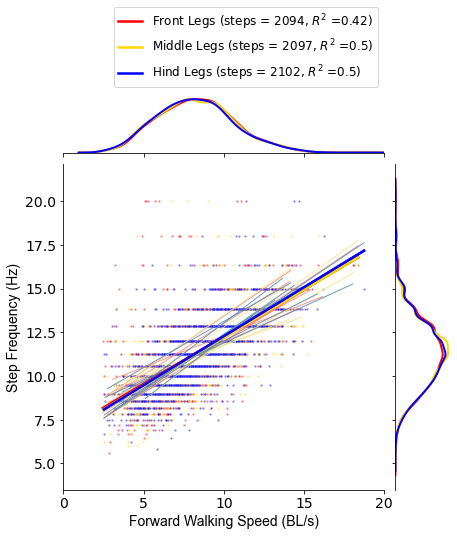

In [90]:
# plot_metric = step_freq_distributions
plot_metric = step_freq_distributions
ylabel_name = 'Step Frequency (Hz)'
fig_name = 'Step_freq'
p_coeff = 1
plot_scatter = True
plot_intralimb_kinematics_marginal_distribution(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

C:\Users\pratt\AppData\Local\Temp\ipykernel_4004\1729944960.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


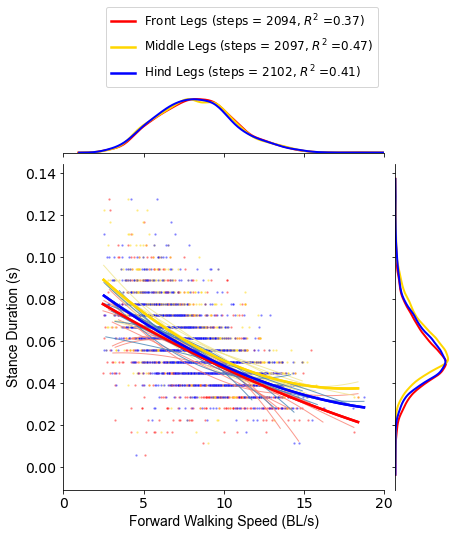

In [91]:
# plot_metric = step_freq_distributions
plot_metric = stance_duration_distributions
ylabel_name = 'Stance Duration (s)'
fig_name = 'Stance_duration'
p_coeff = 2
plot_scatter = True
plot_intralimb_kinematics_marginal_distribution(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

C:\Users\pratt\AppData\Local\Temp\ipykernel_4004\1729944960.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


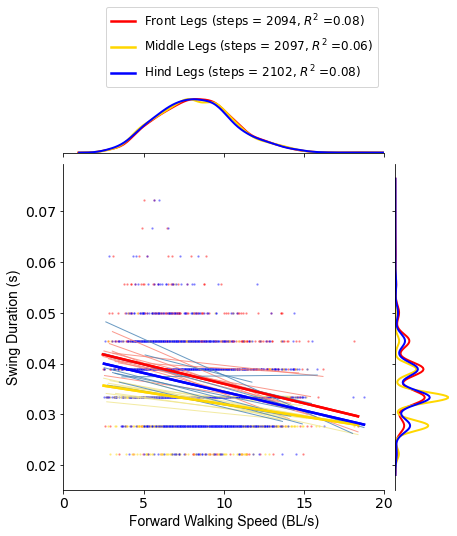

In [92]:
# plot_metric = step_freq_distributions
plot_metric = swing_duration_distributions
ylabel_name = 'Swing Duration (s)'
fig_name = 'Swing_duration'
p_coeff = 1
plot_scatter = True
plot_intralimb_kinematics_marginal_distribution(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

C:\Users\pratt\AppData\Local\Temp\ipykernel_4004\1729944960.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


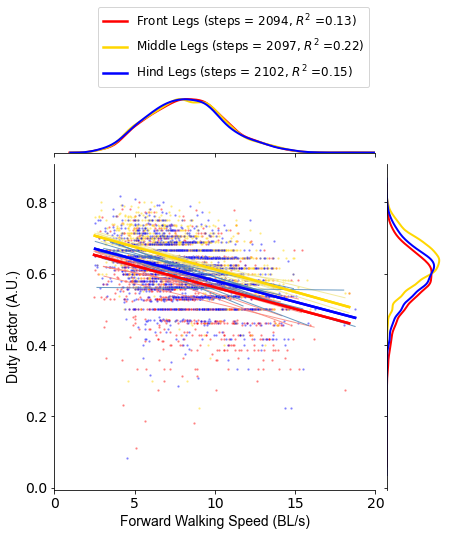

In [93]:
# plot_metric = step_freq_distributions
plot_metric = duty_factor_distributions
ylabel_name = 'Duty Factor (A.U.)'
fig_name = 'duty_factor'
p_coeff = 1
plot_scatter = True
plot_intralimb_kinematics_marginal_distribution(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

C:\Users\pratt\AppData\Local\Temp\ipykernel_4004\1729944960.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


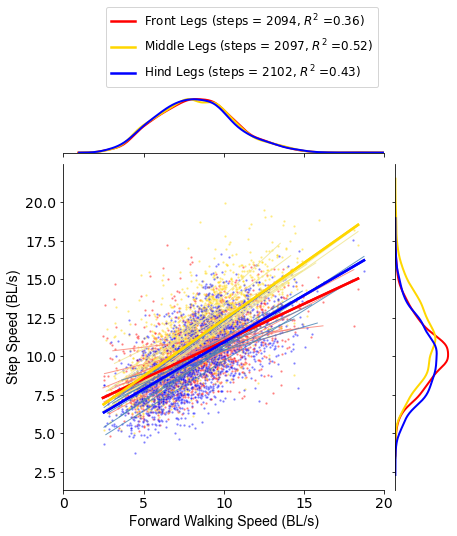

In [94]:
# plot_metric = step_freq_distributions
plot_metric = step_speed_distributions
ylabel_name = 'Step Speed (BL/s)'
fig_name = 'step_speed'
p_coeff = 1
plot_scatter = True
plot_intralimb_kinematics_marginal_distribution(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

C:\Users\pratt\AppData\Local\Temp\ipykernel_4004\1729944960.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


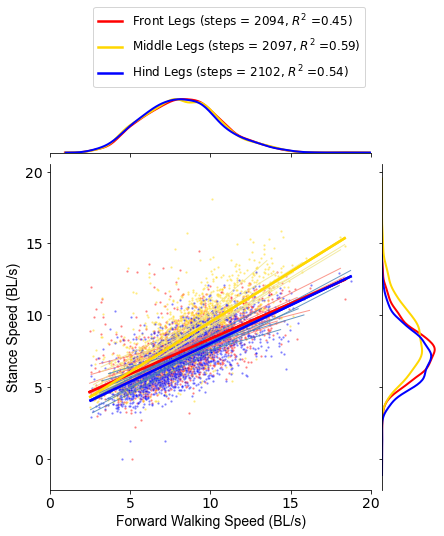

In [95]:
# plot_metric = step_freq_distributions
plot_metric = stance_speed_distributions
ylabel_name = 'Stance Speed (BL/s)'
fig_name = 'stance_speed'
p_coeff = 1
plot_scatter = True
plot_intralimb_kinematics_marginal_distribution(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

C:\Users\pratt\AppData\Local\Temp\ipykernel_4004\1729944960.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


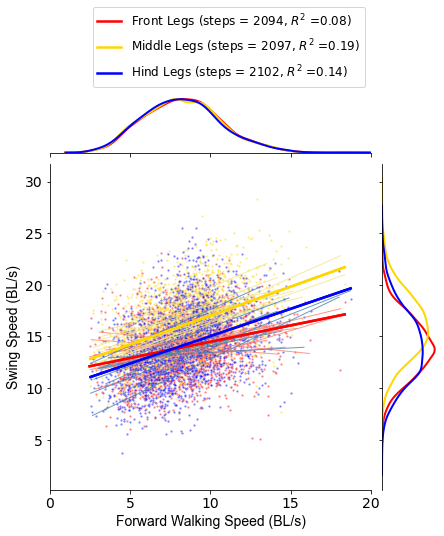

In [96]:
# plot_metric = step_freq_distributions
plot_metric = swing_speed_distributions
ylabel_name = 'Swing Speed (BL/s)'
fig_name = 'swing_speed'
p_coeff = 1
plot_scatter = True
plot_intralimb_kinematics_marginal_distribution(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

C:\Users\pratt\AppData\Local\Temp\ipykernel_4004\1729944960.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


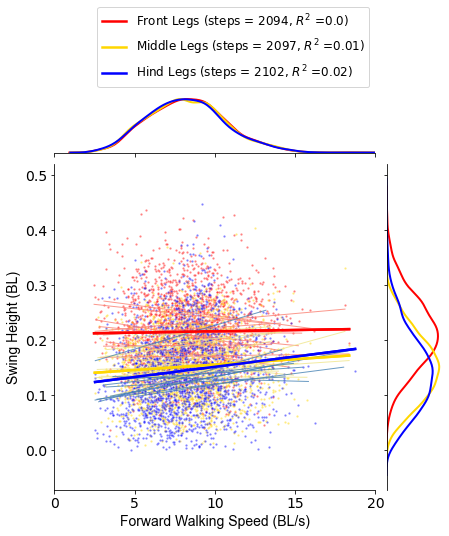

In [97]:
# plot_metric = step_freq_distributions
plot_metric = swing_height_distributions
ylabel_name = 'Swing Height (BL)'
fig_name = 'swing_height'
p_coeff = 1
plot_scatter = True
plot_intralimb_kinematics_marginal_distribution(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

C:\Users\pratt\AppData\Local\Temp\ipykernel_4004\1729944960.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


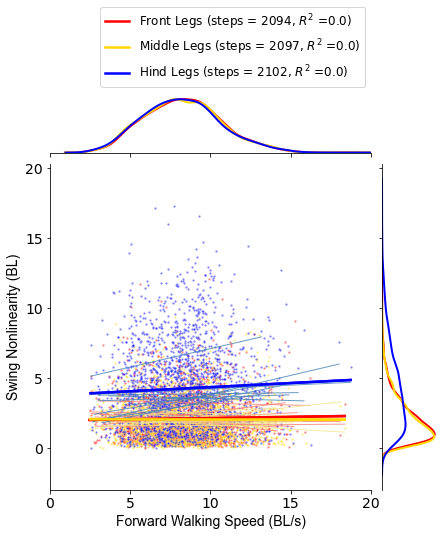

In [98]:
# plot_metric = step_freq_distributions
plot_metric = swing_linearity_distributions
ylabel_name = 'Swing Nonlinearity (BL)'
fig_name = 'swing_nonlinearity'
p_coeff = 1
plot_scatter = True
plot_intralimb_kinematics_marginal_distribution(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

C:\Users\pratt\AppData\Local\Temp\ipykernel_4004\1729944960.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


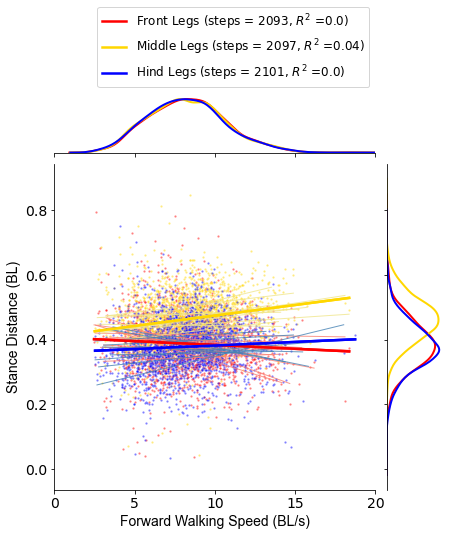

In [99]:
# plot_metric = step_freq_distributions
plot_metric = stance_distance_distributions
ylabel_name = 'Stance Distance (BL)'
fig_name = 'stance_distance'
p_coeff = 1
plot_scatter = True
plot_intralimb_kinematics_marginal_distribution(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

C:\Users\pratt\AppData\Local\Temp\ipykernel_4004\1729944960.py:55: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


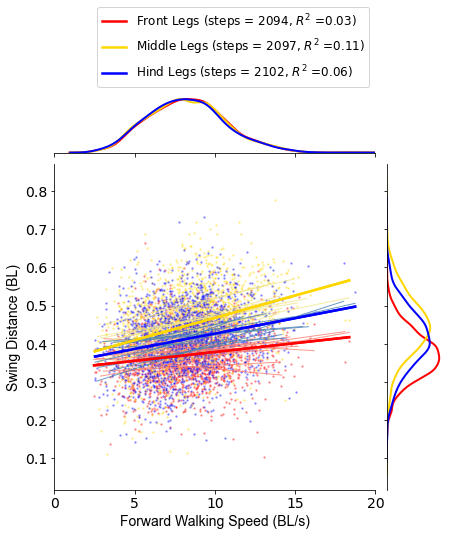

In [100]:
# plot_metric = step_freq_distributions
plot_metric = swing_distance_distributions
ylabel_name = 'Swing Distance (BL)'
fig_name = 'swing_distance'
p_coeff = 1
plot_scatter = True
plot_intralimb_kinematics_marginal_distribution(plot_metric, ylabel_name, fig_name, p_coeff, plot_scatter)

### Trajectories - Dataset for Roman

In [32]:
# find the transition frames of a walking bout
def find_walking_bouts(beh_frames):
    start_frame = np.array([beh_frames[0]])
    for frame in range(len(beh_frames)-1):
        if (beh_frames[frame+1] - beh_frames[frame]) > 1:
            if len(start_frame) == 1:
                end_frame = np.array([beh_frames[frame]])
                start_frame = np.concatenate((start_frame, np.array([beh_frames[frame+1]])))
            else:
                start_frame = np.concatenate((start_frame, np.array([beh_frames[frame+1]])))
                end_frame = np.concatenate((end_frame,np.array([beh_frames[frame]])))
    if ((beh_frames[frame+1] - beh_frames[frame]) == 1) and len(start_frame) == 1:
        end_frame = np.array([beh_frames[-1]])
    else:
        end_frame = np.concatenate((end_frame,np.array([beh_frames[-1]])))
    walking_bout_transitions = np.vstack((start_frame, end_frame))
    
    return walking_bout_transitions                                    

In [570]:
# Limb trajectories
stance_frame_min_threshold = 3 # ~20 ms
stance_frame_max_threshold = 27 # 150 ms
swing_frame_min_threshold = 3 # 20 ms
swing_frame_max_threshold = 13 # 75 ms
walking_bout_threshold = 45 # 250 ms
leg_names = ['R1', 'R2', 'R3','L1', 'L2', 'L3']

unique_flies = np.unique(meta_matrix[:, 0]).astype(int).tolist()[0:10] # for this dataset - focus on the flies with similar body sizes

for fly in unique_flies:
    walking_bout_number = 0
    tot_steps = np.zeros(6) # number of steps
    trial_idxs = np.where(meta_matrix[:, 0] == fly)[0]
    
    # behavior classifier + relevant data for the fly
    beh_ids = beh_class[trial_idxs, :]
    swing_stance_data = swing_stance_mat_posture[:,:,trial_idxs] # posture and walking swing stance matrices are the same
    vel_data = parallel_vel[trial_idxs,:]
    limb_position_x = limb_positions[0,:,:,trial_idxs]
    limb_position_y = limb_positions[1,:,:,trial_idxs]
    limb_position_z = limb_positions[2,:,:,trial_idxs]
    BL_data = np.mean(meta_matrix[trial_idxs,-1])
    bh_data = body_height_walking[trial_idxs,:]
    head_x = body_positions[0,:,trial_idxs]
    head_y = body_positions[1,:,trial_idxs]
    head_z = body_positions[2,:,trial_idxs]
    thorax_x = body_positions[3,:,trial_idxs]
    thorax_y = body_positions[4,:,trial_idxs]
    thorax_z = body_positions[5,:,trial_idxs]
    abdomen_x = body_positions[6,:,trial_idxs]
    abdomen_y = body_positions[7,:,trial_idxs]
    abdomen_z = body_positions[8,:,trial_idxs]
    
    
    for j in range(beh_ids.shape[0]): # trial for the fly
        beh_frames = np.where(beh_ids[j,:]==1)[0]
        if len(beh_frames) > 0 : # make sure there is a walking bout
            walking_bout_transitions = find_walking_bouts(beh_frames)
            
            # iterate through each walking bout and extract out the step trajectories
            if len(walking_bout_transitions) > 0: # there are walking bouts present
                for bout in range(walking_bout_transitions.shape[1]):
                    start_frame = walking_bout_transitions[0,bout]
                    end_frame = walking_bout_transitions[1,bout] + 1
                    walking_bout_frames = np.arange(start_frame, end_frame)
                    
                    if len(walking_bout_frames) > walking_bout_threshold: # walking bout threshold
                        walking_bout_number+=1
                        
                        # define data frame
                        data_df = pd.DataFrame(columns=['Genotype', 'Sex', 'Fly Number', 'Body Lenth [mm]', 'Walking Bout Number',
                                                 'Walking Bout Time [s]', 'Forward Walking Speed [BL/s]', 'Body Height [BL]', 
                                                 'Head Longitudal Position [BL]', 'Head Medial-Lateral Position [BL]', 'Head Vertical Position [BL]',
                                                 'Thorax Longitudal Position [BL]', 'Thorax Medial-Lateral Position [BL]', 'Thorax Vertical Position [BL]',
                                                 'Abdomen Longitudal Position [BL]', 'Abdomen Medial-Lateral Position [BL]', 'Abdomen Vertical Position [BL]',
                                                 'R1 Step Number', 'R1 Stance Swing', 'R1 Longitudal Position [BL]', 'R1 Medial-Lateral Position [BL]', 'R1 Vertical Position [BL]',
                                                 'R2 Step Number', 'R2 Stance Swing', 'R2 Longitudal Position [BL]', 'R2 Medial-Lateral Position [BL]', 'R2 Vertical Position [BL]',
                                                 'R3 Step Number', 'R3 Stance Swing', 'R3 Longitudal Position [BL]', 'R3 Medial-Lateral Position [BL]', 'R3 Vertical Position [BL]',
                                                 'L1 Step Number', 'L1 Stance Swing', 'L1 Longitudal Position [BL]', 'L1 Medial-Lateral Position [BL]', 'L1 Vertical Position [BL]',
                                                 'L2 Step Number', 'L2 Stance Swing', 'L2 Longitudal Position [BL]', 'L2 Medial-Lateral Position [BL]', 'L2 Vertical Position [BL]',
                                                 'L3 Step Number', 'L3 Stance Swing', 'L3 Longitudal Position [BL]', 'L3 Medial-Lateral Position [BL]', 'L3 Vertical Position [BL]'])

                        
                        # for the walking bout - insert information about body movement
                        data_df['Walking Bout Number'] = walking_bout_number*np.ones(len(walking_bout_frames))
                        data_df['Body Height [BL]'] = bh_data[j,walking_bout_frames]
                        data_df['Forward Walking Speed [BL/s]'] = vel_data[j,walking_bout_frames]
                        data_df['Head Longitudal Position [BL]'] = head_x[j,walking_bout_frames]
                        data_df['Head Medial-Lateral Position [BL]'] = head_y[j,walking_bout_frames]
                        data_df['Head Vertical Position [BL]'] = head_z[j,walking_bout_frames]
                        data_df['Thorax Longitudal Position [BL]'] = thorax_x[j,walking_bout_frames]
                        data_df['Thorax Medial-Lateral Position [BL]'] = thorax_y[j,walking_bout_frames]
                        data_df['Thorax Vertical Position [BL]'] = thorax_z[j,walking_bout_frames]
                        data_df['Abdomen Longitudal Position [BL]'] = abdomen_x[j,walking_bout_frames]
                        data_df['Abdomen Medial-Lateral Position [BL]'] = abdomen_y[j,walking_bout_frames]
                        data_df['Abdomen Vertical Position [BL]'] = abdomen_z[j,walking_bout_frames]
                        data_df['Walking Bout Time [s]'] = np.arange(0, (len(walking_bout_frames))*(1/180), (1/180))[0:len(walking_bout_frames)]



                        # iterate through legs
                        for leg in range(6):
                            swing_stance_array = swing_stance_data[leg,start_frame:end_frame,j]

                            # find the first stance start
                            stance_starts = np.where(np.diff(swing_stance_array)==1)[0]+1
                            stance_ends = np.where(np.diff(swing_stance_array)==-1)[0]

                            # There must be at least three stance starts - ignore edge steps
                            if len(stance_starts) > 2:
                                # isolate steps
                                steps = stance_starts[1:-1]
                                for step in range(len(steps)):
                                    # find the end of stance
                                    curr_stance_end = stance_ends[(stance_ends-steps[step]) >= 0][0]
                                    length_stance = curr_stance_end - steps[0]

                                    # determine if stance is within the threshold bounds
                                    if np.logical_and(length_stance>stance_frame_min_threshold, length_stance<stance_frame_max_threshold):
                                        # find the corresponding swing period of the step
                                        swing_start = curr_stance_end + 1
                                        swing_end = stance_starts[(stance_starts-steps[step]) > 0][0]+1 # add one to account for the start of the next stance AEP
                                        length_swing = swing_end - swing_start

                                        # determine if swing is long enough
                                        if np.logical_and(length_swing>swing_frame_min_threshold, length_swing<swing_frame_max_threshold):
                                            stance_frames = walking_bout_frames[steps[step]:curr_stance_end+1]
                                            swing_frames = walking_bout_frames[swing_start:swing_end]

                                            # stance and swing trajectories
                                            stance_x = limb_position_x[j, leg, stance_frames]
                                            swing_x = limb_position_x[j, leg, swing_frames]
                                            stance_y = limb_position_y[j, leg, stance_frames]
                                            swing_y = limb_position_y[j, leg, swing_frames]
                                            stance_z = limb_position_z[j, leg, stance_frames]
                                            swing_z = limb_position_z[j, leg, swing_frames]

                                            stance_swing_str_array = np.concatenate((np.repeat(np.array(['stance']), len(stance_x)),np.repeat(np.array(['swing']), len(swing_x))))

                                            # store all of the relvant information in a dataframe
                                            data_df[leg_names[leg]+' Longitudal Position [BL]'].iloc[steps[step]:swing_end] = np.concatenate((stance_x, swing_x))
                                            data_df[leg_names[leg]+' Medial-Lateral Position [BL]'].iloc[steps[step]:swing_end] = np.concatenate((stance_y, swing_y))
                                            data_df[leg_names[leg]+' Vertical Position [BL]'].iloc[steps[step]:swing_end] = np.concatenate((stance_z, swing_z))
                                            data_df[leg_names[leg]+' Stance Swing'].iloc[steps[step]:swing_end] = stance_swing_str_array
                                            
                                            # update step number
                                            tot_steps[leg] = tot_steps[leg] + 1 
                                            
                                            data_df[leg_names[leg]+' Step Number'].iloc[steps[step]:swing_end] = tot_steps[leg] * np.ones(len(stance_swing_str_array))
                                            
                                            

                        # concatenate data for each data frame
                        if walking_bout_number == 1:
                            cat_df = data_df
                        else:
                            cat_df = pd.concat([cat_df, data_df], axis=0).reset_index(drop=True)
                            
    # store information about each fly
    cat_df['Genotype'] = 'WT Berlin'
    cat_df['Sex'] = 'Male'
    cat_df['Fly Number'] = fly
    cat_df['Body Lenth [mm]'] = BL_data
    
    # concatenate dataframes across flies
    if fly == 1:
        fly_df = cat_df
    else:
        fly_df = pd.concat([fly_df, cat_df], axis=0).reset_index(drop=True)
                            
                                        
                                            


In [523]:
fly_df

,Genotype,Sex,Fly Number,Body Lenth [mm],Walking Bout Number,Walking Bout Time [s],Forward Walking Speed [BL/s],Body Height [BL],Head Longitudal Position [BL],Head Medial-Lateral Position [BL],...,L2 Step Number,L2 Stance Swing,L2 Longitudal Position [BL],L2 Medial-Lateral Position [BL],L2 Vertical Position [BL],L3 Step Number,L3 Stance Swing,L3 Longitudal Position [BL],L3 Medial-Lateral Position [BL],L3 Vertical Position [BL]
0,WT Berlin,Male,1,2.136445,1.0,0.000000,2.445351,NaN,2.561020,-0.141340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WT Berlin,Male,1,2.136445,1.0,0.005556,2.746881,NaN,2.565026,-0.141003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WT Berlin,Male,1,2.136445,1.0,0.011111,3.108480,NaN,2.573335,-0.141470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WT Berlin,Male,1,2.136445,1.0,0.016667,3.437032,NaN,2.585371,-0.143846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WT Berlin,Male,1,2.136445,1.0,0.022222,3.656928,NaN,2.598272,-0.146452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19773,WT Berlin,Male,10,1.912212,38.0,0.405556,10.555143,-0.569257,3.840509,-0.322898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19774,WT Berlin,Male,10,1.912212,38.0,0.411111,9.869249,-0.564158,3.844517,-0.344580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19775,WT Berlin,Male,10,1.912212,38.0,0.416667,9.214114,-0.558783,3.836548,-0.372461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19776,WT Berlin,Male,10,1.912212,38.0,0.422222,8.771570,-0.553161,3.822097,-0.411365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


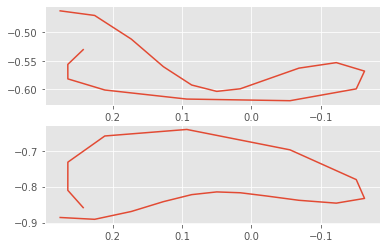

In [576]:
# inspect data
leg_name = 'R2'
fly_num = 8
step_num = 3

test_df = fly_df[(fly_df['Fly Number'].values == fly_num) & (fly_df[leg_name+' Step Number'].values ==step_num)]
x = test_df[leg_name+' Longitudal Position [BL]']
y = test_df[leg_name+' Medial-Lateral Position [BL]']
z = test_df[leg_name+' Vertical Position [BL]']

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(x,y)
plt.gca().invert_xaxis()

plt.subplot(2,1,2)
plt.plot(x,z)
plt.gca().invert_xaxis()

#### Plot step trajectories as a function of walking speed

The following walking speed categories Based on the probability of observing a certain number of legs in stance:

- 0-6 BL/s (slow speed)
- 6-10 BL/s (intermediate speed)
- 10+ (fast speed)

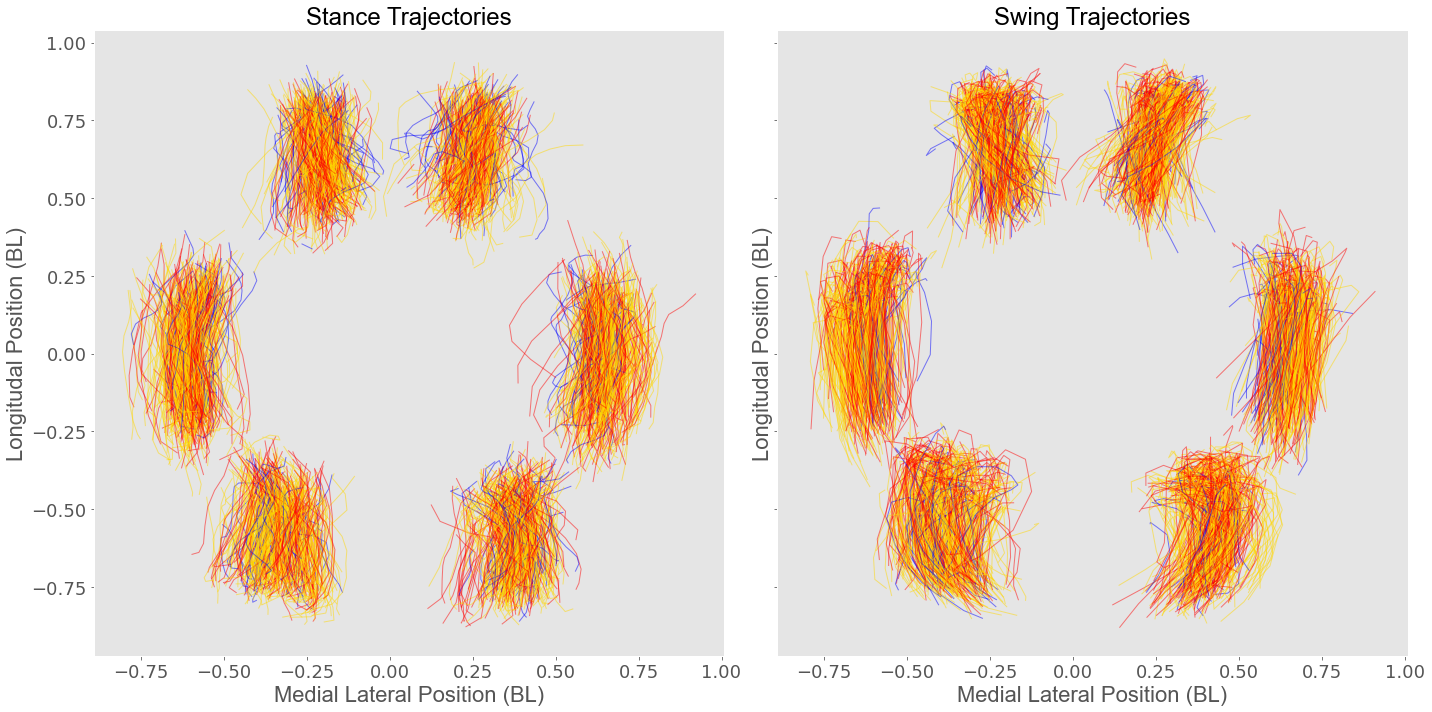

In [617]:
# phase parameters
speed_colors = ['blue', 'gold', 'red']
leg_names = ['R1', 'R2', 'R3','L1', 'L2', 'L3']
fig_name = 'Stance_Swing_Trajectories_all'

fig, axs = plt.subplots(1,2, figsize =[20,10], sharex=True, sharey=True)
u_flies = np.unique(fly_df['Fly Number'].values).tolist()
for fly in u_flies:
    sub_df = fly_df[fly_df['Fly Number']==fly]
    for leg in range(6):
        step_n = sub_df[leg_names[leg]+' Step Number'].values
        u_steps = np.unique(step_n.astype(float))
        u_steps = u_steps[~np.isnan(u_steps)].astype(int)
        
        for j in u_steps:
            step_df = sub_df[sub_df[leg_names[leg]+' Step Number'] == j]
            stance_df = step_df[step_df[leg_names[leg]+' Stance Swing']=='stance']
            swing_df = step_df[step_df[leg_names[leg]+' Stance Swing']=='swing']
            
            # stance plot
            x_stance = stance_df[leg_names[leg] +' Longitudal Position [BL]'].values
            y_stance = stance_df[leg_names[leg] +' Medial-Lateral Position [BL]'].values
            vel_stance = np.mean(stance_df['Forward Walking Speed [BL/s]'].values)
            
            if vel_stance <6:
                plt_color = 'blue'
#                 axs[0].plot(y_stance, x_stance, color = plt_color, linewidth = 1, alpha = 0.5)   
            elif vel_stance > 10:
                plt_color = 'red'
#                 axs[0].plot(y_stance, x_stance, color = plt_color, linewidth = 1, alpha = 0.5) 
            else:
                plt_color = 'gold'
#                 axs[0].plot(y_stance, x_stance, color = plt_color, linewidth = 1, alpha = 0.5) 
            
            # plot line
            axs[0].plot(y_stance, x_stance, color = plt_color, linewidth = 1, alpha = 0.5)    
            
            # swing df
            x_swing = swing_df[leg_names[leg] +' Longitudal Position [BL]'].values
            y_swing = swing_df[leg_names[leg] +' Medial-Lateral Position [BL]'].values
            vel_swing = np.mean(swing_df['Forward Walking Speed [BL/s]'].values)
            
            if vel_swing <6:
                plt_color = 'blue'
#                 axs[1].plot(y_swing, x_swing, color = plt_color, linewidth = 1, alpha = 0.5) 
            elif vel_swing > 10:
                plt_color = 'red'
#                 axs[1].plot(y_swing, x_swing, color = plt_color, linewidth = 1, alpha = 0.5) 
            else:
                plt_color = 'gold'
#                 axs[1].plot(y_swing, x_swing, color = plt_color, linewidth = 1, alpha = 0.5) 
            
            # plot line
            axs[1].plot(y_swing, x_swing, color = plt_color, linewidth = 1, alpha = 0.5) 
        
# set plot parameters
axs[0].grid(False)
axs[1].grid(False)

axs[0].set_ylabel('Longitudal Position (BL)', fontsize = 22, fontname="Arial")
axs[0].set_xlabel('Medial Lateral Position (BL)', fontsize = 22, fontname="Arial")
axs[1].set_ylabel('Longitudal Position (BL)', fontsize = 22, fontname="Arial")
axs[1].set_xlabel('Medial Lateral Position (BL)', fontsize = 22, fontname="Arial")
axs[0].tick_params(axis='both', labelsize=18)
axs[1].tick_params(axis='both', labelsize=18)

axs[0].set_title('Stance Trajectories', fontsize = 24, fontname="Arial")
axs[1].set_title('Swing Trajectories', fontsize = 24, fontname="Arial")

axs[0].invert_xaxis()
axs[1].invert_xaxis()
    
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + fig_name+'.png', dpi = 200)
fig.savefig(figure_dir + fig_name+'.pdf', dpi = 200)

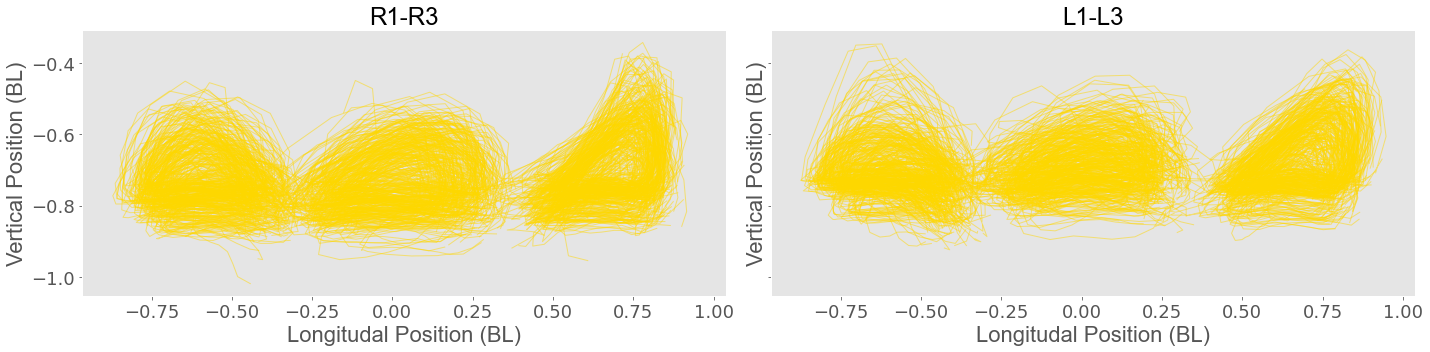

In [621]:
# Vertical trajectories
leg_names = ['R1', 'R2', 'R3','L1', 'L2', 'L3']
fig_name = 'Vertical_Step_Trajectories_all'

fig, axs = plt.subplots(1,2, figsize =[20,5], sharex=True, sharey=True)
u_flies = np.unique(fly_df['Fly Number'].values).tolist()
for leg in range(6):
    for fly in u_flies:
        sub_df = fly_df[fly_df['Fly Number']==fly]
        step_n = sub_df[leg_names[leg]+' Step Number'].values
        u_steps = np.unique(step_n.astype(float))
        u_steps = u_steps[~np.isnan(u_steps)].astype(int)
        
        for j in u_steps:
            step_df = sub_df[sub_df[leg_names[leg]+' Step Number'] == j]
            
            # vertical and longitudal trajectories
            x_stance = step_df[leg_names[leg] +' Longitudal Position [BL]'].values
            z_stance = step_df[leg_names[leg] +' Vertical Position [BL]'].values
            vel_stance = np.mean(step_df['Forward Walking Speed [BL/s]'].values)
            
            if vel_stance <6:
                plt_color = 'blue'
                # plot line
#                 if leg <3:
#                     axs[0].plot(x_stance, z_stance, color = plt_color, linewidth = 1, alpha = 0.5) 
#                 else:
#                     axs[1].plot(x_stance, z_stance, color = plt_color, linewidth = 1, alpha = 0.5)
            elif vel_stance > 10:
                plt_color = 'red'
#                 if leg <3:
#                     axs[0].plot(x_stance, z_stance, color = plt_color, linewidth = 1, alpha = 0.5) 
#                 else:
#                     axs[1].plot(x_stance, z_stance, color = plt_color, linewidth = 1, alpha = 0.5)
            else:
                plt_color = 'gold'
#                 if leg <3:
#                     axs[0].plot(x_stance, z_stance, color = plt_color, linewidth = 1, alpha = 0.5) 
#                 else:
#                     axs[1].plot(x_stance, z_stance, color = plt_color, linewidth = 1, alpha = 0.5)
            
            # plot line
            if leg <3:
                axs[0].plot(x_stance, z_stance, color = plt_color, linewidth = 1, alpha = 0.5) 
            else:
                axs[1].plot(x_stance, z_stance, color = plt_color, linewidth = 1, alpha = 0.5)
                
# leg-specific plot parameters
axs[0].grid(False)
axs[0].set_xlabel('Longitudal Position (BL)', fontsize = 22, fontname="Arial")
axs[0].set_ylabel('Vertical Position (BL)', fontsize = 22, fontname="Arial")
axs[0].tick_params(axis='both', labelsize=18)
axs[0].set_title('R1-R3', fontsize = 24, fontname="Arial")
        
axs[1].grid(False)
axs[1].set_xlabel('Longitudal Position (BL)', fontsize = 22, fontname="Arial")
axs[1].set_ylabel('Vertical Position (BL)', fontsize = 22, fontname="Arial")
axs[1].tick_params(axis='both', labelsize=18)
axs[1].set_title('L1-L3', fontsize = 24, fontname="Arial")
          
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + fig_name+'.png', dpi = 200)
fig.savefig(figure_dir + fig_name+'.pdf', dpi = 200)

In [623]:
# convert body height to be positive
fly_df['Body Height [BL]'] = -fly_df['Body Height [BL]'].values

In [625]:
# save dataframe
filename = figure_dir + '3D_walking_kinematics.csv'
fly_df.to_csv(filename, index=False)

In [635]:
# Load in data
reload_df = pd.read_csv(filename)
reload_df

,Genotype,Sex,Fly Number,Body Lenth [mm],Walking Bout Number,Walking Bout Time [s],Forward Walking Speed [BL/s],Body Height [BL],Head Longitudal Position [BL],Head Medial-Lateral Position [BL],...,L2 Step Number,L2 Stance Swing,L2 Longitudal Position [BL],L2 Medial-Lateral Position [BL],L2 Vertical Position [BL],L3 Step Number,L3 Stance Swing,L3 Longitudal Position [BL],L3 Medial-Lateral Position [BL],L3 Vertical Position [BL]
0,WT Berlin,Male,1,2.136445,1.0,0.000000,2.445351,NaN,2.561020,-0.141340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WT Berlin,Male,1,2.136445,1.0,0.005556,2.746881,NaN,2.565026,-0.141003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WT Berlin,Male,1,2.136445,1.0,0.011111,3.108480,NaN,2.573335,-0.141470,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WT Berlin,Male,1,2.136445,1.0,0.016667,3.437032,NaN,2.585371,-0.143846,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WT Berlin,Male,1,2.136445,1.0,0.022222,3.656928,NaN,2.598272,-0.146452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19773,WT Berlin,Male,10,1.912212,38.0,0.405556,10.555143,0.569257,3.840509,-0.322898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19774,WT Berlin,Male,10,1.912212,38.0,0.411111,9.869249,0.564158,3.844517,-0.344580,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19775,WT Berlin,Male,10,1.912212,38.0,0.416667,9.214114,0.558783,3.836548,-0.372461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19776,WT Berlin,Male,10,1.912212,38.0,0.422222,8.771570,0.553161,3.822097,-0.411365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### AEP and PEP for certain speed bins

In [33]:
def spatial_kinematics_x(metric, w_vel, n_step_threshold):
    # iterate through legs 
    leg_dists = [] # front, middle, hind
    for leg in range(3):
        dist_cnt = 0
        for fly in np.unique(meta_matrix[:, 0]).astype(int).tolist()[0:10]:
            trial_idxs = np.where(meta_matrix[:, 0] == fly)[0]

            # extract data
            vel_data = w_vel[trial_idxs,:].flatten()
            leg1_data = metric[leg, :, trial_idxs].flatten() # doesn't need to be transposed
            leg2_data = metric[leg+3, :, trial_idxs].flatten()

            # behavior classifier
            beh_ids = beh_class[trial_idxs, :].flatten()

            # filter for forward walking behavior == 1
            fw_vel_data = vel_data[beh_ids==1]
            fw_leg1_data = leg1_data[beh_ids==1]
            fw_leg2_data = leg2_data[beh_ids==1]

            # concatenate data
            cat_vel = np.concatenate((fw_vel_data, fw_vel_data))
            cat_data = np.concatenate((fw_leg1_data, fw_leg2_data))

            # filter concatenated data to remove Nans
            filter_vels = cat_vel[~np.isnan(cat_data)]
            filter_data  = cat_data[~np.isnan(cat_data)]

            # if there are a sufficient number of steps then store data as a distribution
            if len(filter_data) >= n_step_threshold:
                if dist_cnt == 0:
                    data_dist = filter_data
                    vel_dist = filter_vels
                    fly_dist = fly*np.ones(len(filter_data))
                    dist_cnt = 1
                else:
                    data_dist = np.concatenate((data_dist, filter_data))
                    vel_dist = np.concatenate((vel_dist, filter_vels))
                    fly_dist = np.concatenate((fly_dist, fly*np.ones(len(filter_data))))

        # stack data
        all_data = np.vstack((fly_dist, vel_dist, data_dist))
        leg_dists.append(all_data)
    return leg_dists

In [34]:
def spatial_kinematics_y(metric, w_vel, n_step_threshold):
    # iterate through legs 
    leg_dists = [] # front, middle, hind
    for leg in range(3):
        dist_cnt = 0
        for fly in np.unique(meta_matrix[:, 0]).astype(int).tolist()[0:10]:
            trial_idxs = np.where(meta_matrix[:, 0] == fly)[0]

            # extract data
            vel_data = w_vel[trial_idxs,:].flatten()
            leg1_data = -metric[leg, :, trial_idxs].flatten() # doesn't need to be transposed
            leg2_data = metric[leg+3, :, trial_idxs].flatten()

            # behavior classifier
            beh_ids = beh_class[trial_idxs, :].flatten()

            # filter for forward walking behavior == 1
            fw_vel_data = vel_data[beh_ids==1]
            fw_leg1_data = leg1_data[beh_ids==1]
            fw_leg2_data = leg2_data[beh_ids==1]

            # concatenate data
            cat_vel = np.concatenate((fw_vel_data, fw_vel_data))
            cat_data = np.concatenate((fw_leg1_data, fw_leg2_data))

            # filter concatenated data to remove Nans
            filter_vels = cat_vel[~np.isnan(cat_data)]
            filter_data  = cat_data[~np.isnan(cat_data)]

            # if there are a sufficient number of steps then store data as a distribution
            if len(filter_data) >= n_step_threshold:
                if dist_cnt == 0:
                    data_dist = filter_data
                    vel_dist = filter_vels
                    fly_dist = fly*np.ones(len(filter_data))
                    dist_cnt = 1
                else:
                    data_dist = np.concatenate((data_dist, filter_data))
                    vel_dist = np.concatenate((vel_dist, filter_vels))
                    fly_dist = np.concatenate((fly_dist, fly*np.ones(len(filter_data))))

        # stack data
        all_data = np.vstack((fly_dist, vel_dist, data_dist))
        leg_dists.append(all_data)
    return leg_dists

In [35]:
n_step_threshold = 15
aepx_dist = spatial_kinematics_x(aepx, parallel_vel, n_step_threshold)
aepy_dist = spatial_kinematics_y(aepy, parallel_vel, n_step_threshold)
pepx_dist = spatial_kinematics_x(pepx, parallel_vel, n_step_threshold)
pepy_dist = spatial_kinematics_y(pepy, parallel_vel, n_step_threshold)

In [36]:
# pool data based on walking speed and compute stats
    
# mean stats for flies
flies = np.unique(aepx_dist[0][0,:]).astype(int).tolist()
aepx_stats = np.zeros((len(flies), 2, 3, 3)) # number of flies, mean/Nsteps, legs, slow/intermediate/fast walking speeds
aepy_stats = np.zeros((len(flies), 2, 3, 3)) # number of flies, mean/Nsteps, legs, slow/intermediate/fast walking speeds
pepx_stats = np.zeros((len(flies), 2, 3, 3)) # number of flies, mean/Nsteps, legs, slow/intermediate/fast walking speeds
pepy_stats = np.zeros((len(flies), 2, 3, 3)) # number of flies, mean/Nsteps, legs, slow/intermediate/fast walking speeds

# Means for legs
aepx_leg_mean = np.zeros((3,2,3)) # slow/intermediate/fast, stats, legs
aepx_speed_dist = []
aepy_leg_mean = np.zeros((3,2,3)) # slow/intermediate/fast, stats, legs
aepy_speed_dist = []
pepx_leg_mean = np.zeros((3,2,3)) # slow/intermediate/fast, stats, legs
pepx_speed_dist = []
pepy_leg_mean = np.zeros((3,2,3)) # slow/intermediate/fast, stats, legs
pepy_speed_dist = []

for leg in range(3):
    # slow, intermediate, and fast walking speed distributions
    '''AEP'''
    aepx_slow = aepx_dist[leg][2, aepx_dist[leg][1,:] < 6]
    aepx_interm = aepx_dist[leg][2, np.logical_and(aepx_dist[leg][1,:] >= 6,aepx_dist[leg][1,:] <= 10)]
    aepx_fast = aepx_dist[leg][2, aepx_dist[leg][1,:] > 10]
    aepx_speed_dist.append([aepx_slow, aepx_interm, aepx_fast])
    aepx_leg_mean[0,0,leg] = np.nanmean(aepx_slow)
    aepx_leg_mean[1,0,leg] = np.nanmean(aepx_interm)
    aepx_leg_mean[2,0,leg] = np.nanmean(aepx_fast)
    aepx_leg_mean[0,1,leg] = len(aepx_slow)
    aepx_leg_mean[1,1,leg] = len(aepx_interm)
    aepx_leg_mean[2,1,leg] = len(aepx_fast)
    
    aepy_slow = aepy_dist[leg][2, aepx_dist[leg][1,:] < 6]
    aepy_interm = aepy_dist[leg][2, np.logical_and(aepx_dist[leg][1,:] >= 6,aepx_dist[leg][1,:] <= 10)]
    aepy_fast = aepy_dist[leg][2, aepx_dist[leg][1,:] > 10]
    aepy_speed_dist.append([aepy_slow, aepy_interm, aepy_fast])
    aepy_leg_mean[0,0,leg] = np.nanmean(aepy_slow)
    aepy_leg_mean[1,0,leg] = np.nanmean(aepy_interm)
    aepy_leg_mean[2,0,leg] = np.nanmean(aepy_fast)
    aepy_leg_mean[0,1,leg] = len(aepy_slow)
    aepy_leg_mean[1,1,leg] = len(aepy_interm)
    aepy_leg_mean[2,1,leg] = len(aepy_fast)
    
    '''PEP'''
    pepx_slow = pepx_dist[leg][2, aepx_dist[leg][1,:] < 6]
    pepx_interm = pepx_dist[leg][2, np.logical_and(aepx_dist[leg][1,:] >= 6,aepx_dist[leg][1,:] <= 10)]
    pepx_fast = pepx_dist[leg][2, aepx_dist[leg][1,:] > 10]
    pepx_speed_dist.append([pepx_slow, pepx_interm, pepx_fast])
    pepx_leg_mean[0,0,leg] = np.nanmean(pepx_slow)
    pepx_leg_mean[1,0,leg] = np.nanmean(pepx_interm)
    pepx_leg_mean[2,0,leg] = np.nanmean(pepx_fast)
    pepx_leg_mean[0,1,leg] = len(pepx_slow)
    pepx_leg_mean[1,1,leg] = len(pepx_interm)
    pepx_leg_mean[2,1,leg] = len(pepx_fast)
    
    pepy_slow = pepy_dist[leg][2, aepx_dist[leg][1,:] < 6]
    pepy_interm = pepy_dist[leg][2, np.logical_and(aepx_dist[leg][1,:] >= 6,aepx_dist[leg][1,:] <= 10)]
    pepy_fast = pepy_dist[leg][2, aepx_dist[leg][1,:] > 10]
    pepy_speed_dist.append([pepy_slow, pepy_interm, pepy_fast])
    pepy_leg_mean[0,0,leg] = np.nanmean(pepy_slow)
    pepy_leg_mean[1,0,leg] = np.nanmean(pepy_interm)
    pepy_leg_mean[2,0,leg] = np.nanmean(pepy_fast)
    pepy_leg_mean[0,1,leg] = len(pepy_slow)
    pepy_leg_mean[1,1,leg] = len(pepy_interm)
    pepy_leg_mean[2,1,leg] = len(pepy_fast)
    
    for j in flies:
        # velocity
        aepx_vel = aepx_dist[leg][1,aepx_dist[leg][0,:]==j]
        
        # data
        aepx_vals = aepx_dist[leg][2,aepx_dist[leg][0,:]==j]
        aepy_vals = aepy_dist[leg][2,aepx_dist[leg][0,:]==j]
        pepx_vals = pepx_dist[leg][2,aepx_dist[leg][0,:]==j]
        pepy_vals = pepy_dist[leg][2,aepx_dist[leg][0,:]==j]
        
        # compute stats across walking speeds
        #AEP
        aepx_stats[j-1,0,leg,0] = np.nanmean(aepx_vals[aepx_vel<6])
        aepx_stats[j-1,0,leg,1] = np.nanmean(aepx_vals[np.logical_and(aepx_vel>=6, aepx_vel<=10)])
        aepx_stats[j-1,0,leg,2] = np.nanmean(aepx_vals[aepx_vel>10])
        aepx_stats[j-1,1,leg,0] = len(aepx_vals[aepx_vel<6])
        aepx_stats[j-1,1,leg,1] = len(aepx_vals[np.logical_and(aepx_vel>=6, aepx_vel<=10)])
        aepx_stats[j-1,1,leg,2] = len(aepx_vals[aepx_vel>10])
        
        aepy_stats[j-1,0,leg,0] = np.nanmean(aepy_vals[aepx_vel<6])
        aepy_stats[j-1,0,leg,1] = np.nanmean(aepy_vals[np.logical_and(aepx_vel>=6, aepx_vel<=10)])
        aepy_stats[j-1,0,leg,2] = np.nanmean(aepy_vals[aepx_vel>10])
        aepy_stats[j-1,1,leg,0] = len(aepy_vals[aepx_vel<6])
        aepy_stats[j-1,1,leg,1] = len(aepy_vals[np.logical_and(aepx_vel>=6, aepx_vel<=10)])
        aepy_stats[j-1,1,leg,2] = len(aepy_vals[aepx_vel>10])
        
        # PEP
        pepx_stats[j-1,0,leg,0] = np.nanmean(pepx_vals[aepx_vel<6])
        pepx_stats[j-1,0,leg,1] = np.nanmean(pepx_vals[np.logical_and(aepx_vel>=6, aepx_vel<=10)])
        pepx_stats[j-1,0,leg,2] = np.nanmean(pepx_vals[aepx_vel>10])
        pepx_stats[j-1,1,leg,0] = len(pepx_vals[aepx_vel<6])
        pepx_stats[j-1,1,leg,1] = len(pepx_vals[np.logical_and(aepx_vel>=6, aepx_vel<=10)])
        pepx_stats[j-1,1,leg,2] = len(pepx_vals[aepx_vel>10])
        
        pepy_stats[j-1,0,leg,0] = np.nanmean(pepy_vals[aepx_vel<6])
        pepy_stats[j-1,0,leg,1] = np.nanmean(pepy_vals[np.logical_and(aepx_vel>=6, aepx_vel<=10)])
        pepy_stats[j-1,0,leg,2] = np.nanmean(pepy_vals[aepx_vel>10])
        pepy_stats[j-1,1,leg,0] = len(pepy_vals[aepx_vel<6])
        pepy_stats[j-1,1,leg,1] = len(pepy_vals[np.logical_and(aepx_vel>=6, aepx_vel<=10)])
        pepy_stats[j-1,1,leg,2] = len(pepy_vals[aepx_vel>10])
        
        

#### Plot AEP and PEP

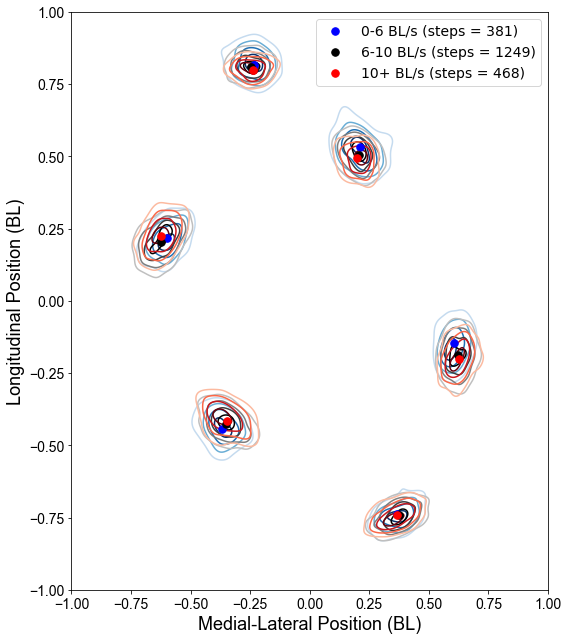

In [37]:
# generate new colormaps
nlevels = 4
start_cval = 0.25
newcmps = []
level_vals = [0.3, 0.5, 0.7, 0.9] # [0.25,0.5, 0.75, 1]
# plt_colors = ['purple', 'green', 'orange']
# fly_colors = ['violet', 'mediumseagreen', 'tan']
# org_cmaps = ['Purples', 'Greens', 'Oranges']
plt_colors = ['blue', 'black', 'red']
fly_colors = ['steelblue', 'gray', 'salmon']
org_cmaps = ['Blues', 'binary', 'Reds']
for j in range(len(org_cmaps)):
    org_cmap = cm.get_cmap(org_cmaps[j], 100)
    newcolors = org_cmap(np.linspace(0.25, 1, nlevels))
    newcmp = ListedColormap(newcolors)
    newcmps.append(newcmp)
    
fig = plt.figure(1, figsize = [8,9])
for leg in range(3):
    for speed in range(3):
        if leg ==0 and speed ==0:
            for i in range(3):
                plt.plot(np.array([-aepy_leg_mean[i,0,leg]]), np.array([aepx_leg_mean[i,0,leg]]), color = plt_colors[i], marker = '.', markersize = 15, linestyle = 'none')
            plt.legend(['0-6 BL/s (steps = '+str(int(np.round(np.mean(aepy_leg_mean[0,1,:]))))+')',
                       '6-10 BL/s (steps = '+str(int(np.round(np.mean(aepy_leg_mean[1,1,:]))))+')',
                       '10+ BL/s (steps = '+str(int(np.round(np.mean(aepy_leg_mean[2,1,:]))))+')'], fontsize = 14)
       
        # plot distrbutions
        sea.kdeplot(x=-aepy_speed_dist[leg][speed], y=aepx_speed_dist[leg][speed], cmap = newcmps[speed], levels = level_vals)
        sea.kdeplot(x=pepy_speed_dist[leg][speed], y=pepx_speed_dist[leg][speed], cmap = newcmps[speed], levels = level_vals)
        
#         # plot fly means
#         plt.plot(-aepy_stats[:,0,leg,speed], aepx_stats[:,0,leg,speed], color = fly_colors[speed], marker = '.', markersize = 10, linestyle = 'none', zorder = 1)
#         plt.plot(pepy_stats[:,0,leg,speed], pepx_stats[:,0,leg,speed], color = fly_colors[speed], marker = '.', markersize = 10, linestyle = 'none', zorder = 1)
        
         # Global mean
        plt.plot(np.array([-aepy_leg_mean[speed,0,leg]]), np.array([aepx_leg_mean[speed,0,leg]]), color = plt_colors[speed], marker = '.', markersize = 15, linestyle = 'none', zorder=15)
        plt.plot(np.array([pepy_leg_mean[speed,0,leg]]), np.array([pepx_leg_mean[speed,0,leg]]), color = plt_colors[speed], marker = '.', markersize = 15, linestyle = 'none', zorder=15)
        
        
# plot specs
plt.xticks(fontsize = 14, fontname = 'Arial')
plt.yticks(fontsize = 14, fontname = 'Arial')
plt.ylabel('Longitudinal Position (BL)',fontsize = 18, fontname = 'Arial')
plt.xlabel('Medial-Lateral Position (BL)',fontsize = 18, fontname = 'Arial')
plt.xlim([-1,1])
plt.ylim([-1,1])


plt.tight_layout()
plt.show()
fig.savefig(figure_dir + 'AEP_PEP.png', dpi = 200)
fig.savefig(figure_dir + 'AEP_PEP.pdf', dpi = 200)

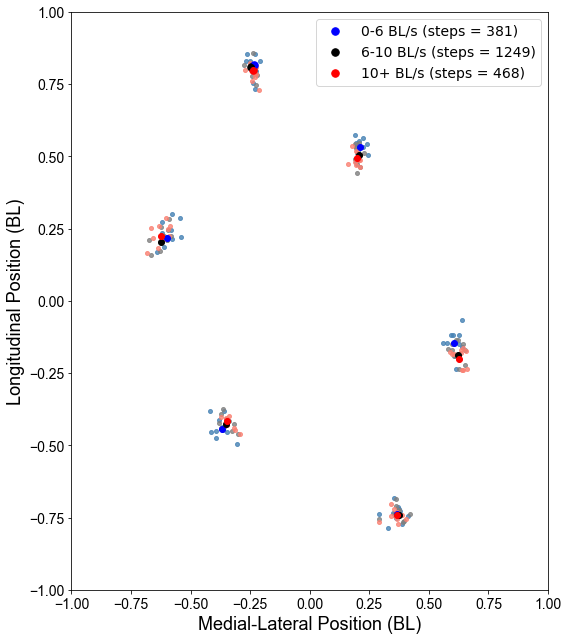

In [39]:
# spread fly 
plt_colors = ['blue', 'black', 'red']
fly_colors = ['steelblue', 'gray', 'salmon']
org_cmaps = ['Blues', 'binary', 'Reds']
    
fig = plt.figure(1, figsize = [8,9])
for leg in range(3):
    for speed in range(3):
        if leg ==0 and speed ==0:
            for i in range(3):
                plt.plot(np.array([-aepy_leg_mean[i,0,leg]]), np.array([aepx_leg_mean[i,0,leg]]), color = plt_colors[i], marker = '.', markersize = 15, linestyle = 'none')
            plt.legend(['0-6 BL/s (steps = '+str(int(np.round(np.mean(aepy_leg_mean[0,1,:]))))+')',
                       '6-10 BL/s (steps = '+str(int(np.round(np.mean(aepy_leg_mean[1,1,:]))))+')',
                       '10+ BL/s (steps = '+str(int(np.round(np.mean(aepy_leg_mean[2,1,:]))))+')'], fontsize = 14)
       
        # plot fly means
        plt.plot(-aepy_stats[:,0,leg,speed], aepx_stats[:,0,leg,speed], color = fly_colors[speed], marker = '.', markersize = 8, linestyle = 'none', zorder = 1, alpha =0.8)
        plt.plot(pepy_stats[:,0,leg,speed], pepx_stats[:,0,leg,speed], color = fly_colors[speed], marker = '.', markersize = 8, linestyle = 'none', zorder = 1, alpha =0.8)
        
         # Global mean
        plt.plot(np.array([-aepy_leg_mean[speed,0,leg]]), np.array([aepx_leg_mean[speed,0,leg]]), color = plt_colors[speed], marker = '.', markersize = 12, linestyle = 'none', zorder=15)
        plt.plot(np.array([pepy_leg_mean[speed,0,leg]]), np.array([pepx_leg_mean[speed,0,leg]]), color = plt_colors[speed], marker = '.', markersize = 12, linestyle = 'none', zorder=15)
        
        
# plot specs
plt.xticks(fontsize = 14, fontname = 'Arial')
plt.yticks(fontsize = 14, fontname = 'Arial')
plt.ylabel('Longitudinal Position (BL)',fontsize = 18, fontname = 'Arial')
plt.xlabel('Medial-Lateral Position (BL)',fontsize = 18, fontname = 'Arial')
plt.xlim([-1,1])
plt.ylim([-1,1])


plt.tight_layout()
plt.show()
fig.savefig(figure_dir + 'AEP_PEP_fly.png', dpi = 200)
fig.savefig(figure_dir + 'AEP_PEP_fly.pdf', dpi = 200)

### Inter-leg Coordination

In [5]:
# calculate mean of polar distributions by transforming them into cartesian coordinates then back to polar coordinates
def estimate_ang_stats(var):
#     mean_angle = np.arctan2(np.nanmedian(np.sin(var)), np.nanmedian(np.cos(var)))
    mean_angle = np.arctan2(np.nanmean(np.sin(var)), np.nanmean(np.cos(var)))
    angular_dispersion = np.sqrt(np.nanmean(np.sin(var))**2 + np.nanmean(np.cos(var))**2) # 0: uniform, 1: concetrated in one directtion
    return mean_angle, angular_dispersion

In [6]:
def compute_histogram(var, N):
    hist, bin_edges = np.histogram(var, bins=N, range=(0.0,2*np.pi), density=True)
    bin_centers = bin_edges[1::] - ((bin_edges[1]- bin_edges[0])/2)
    return hist, bin_centers 


In [7]:
# transform phase values to between -np.pi to np.pi
def transform_half_polar(var):
    var[var>np.pi] = var[var>np.pi] - (2*np.pi)
    return var

In [24]:
def full_distribution_transform_polar(var):
    var[var<0] = np.pi + np.abs(-np.pi - var[var<0])
    return var

In [8]:
def compute_inphase_histogram(var, N):
    hist, bin_edges = np.histogram(var, bins=N, range=(-np.pi, np.pi), density=True)
    bin_centers = bin_edges[1::] - ((bin_edges[1]- bin_edges[0])/2)
    return hist, bin_centers 

In [9]:
# function that transforms that space from 0 to pi to 0 to 2pi
def transform_polar(org_val):
    if org_val < 0: # only need to transform negative values to extend the space to 2pi
        transformed_val = np.pi + np.abs(-np.pi - org_val)
    else: 
        transformed_val = org_val
        
    return transformed_val

In [30]:
# relative phase distributions - to L1
relative_leg = [3, 3, 3, 3, 3] # L1-R1, L1-R2, L1-R3, L1-L2, L1-L3
inphase_comparasions = [1,4]
step_threshold = 10 # empirically determined
Nbins = 15
flies = np.unique(meta_matrix[:, 0]).astype(int).tolist()[0:10]
fly_phase_stats = np.zeros((len(flies), 2, len(relative_leg), 3)) # flies, phase/max_prob, phase comparasion, slow/intermediate/fast
phase_dists = np.zeros((len(relative_leg), Nbins, 2, 3)) # phases, bins, prob/centers, slow/intermediate/fast
full_phase_dist = []

# iterate through phase comparasions
for p in range(len(relative_leg)):
    for fly in flies:
        trial_idxs = np.where(meta_matrix[:, 0] == fly)[0]
        vel_data = parallel_vel[trial_idxs,:].flatten()
        phase_data = phase[p, :, trial_idxs].flatten()
        beh_ids = beh_class[trial_idxs, :].flatten()
        
        # forward walking data
        fw_vel_data = vel_data[beh_ids==1]
        fw_phase_data = phase_data[beh_ids==1]
        
        # filter data - remove negative 1 and nan values
        filt_vel = fw_vel_data[fw_phase_data != -1]
        filt_phase = fw_phase_data[fw_phase_data != -1]
        
        filt_vel = filt_vel[~np.isnan(filt_phase)]
        filt_phase = filt_phase[~np.isnan(filt_phase)]
        
        # split phase into the different walking speed categories - rescale from 0-1 to 0-2pi
        slow_phase = filt_phase[filt_vel<6]*(2*np.pi)
        intermediate_phase = filt_phase[np.logical_and(filt_vel>=6, filt_vel<=10)]*(2*np.pi)
        fast_phase = filt_phase[filt_vel>10]*(2*np.pi)
        
        # compute fly specific stats
        '''slow'''
        if len(slow_phase) > step_threshold:
            slow_mean, _ = estimate_ang_stats(slow_phase)
            if p in inphase_comparasions:
                fly_phase_stats[fly-1, 0, p, 0] = slow_mean
                
                # distribution
                fly_slow_dist = transform_half_polar(slow_phase)
                slow_prob, slow_bin_centers = compute_inphase_histogram(fly_slow_dist, Nbins)
                
                # interpolate between these values to determine the probability at average phase
                f = interpolate.interp1d(slow_bin_centers, slow_prob)
                fly_phase_stats[fly-1, 1, p, 0] =  f(slow_mean)
                
            else:
                fly_phase_stats[fly-1, 0, p, 0] = transform_polar(slow_mean)
                
                # distribution
                slow_prob, slow_bin_centers = compute_histogram(slow_phase, Nbins)
                
                # interpolate between these values to determine the probability at average phase
                f = interpolate.interp1d(slow_bin_centers, slow_prob)
                fly_phase_stats[fly-1, 1, p, 0] =  f(transform_polar(slow_mean))
                
        '''intermediate'''
        if len(intermediate_phase) > step_threshold:
            intermediate_mean, _ = estimate_ang_stats(intermediate_phase)
            if p in inphase_comparasions:
                fly_phase_stats[fly-1, 0, p, 1] = intermediate_mean
                
                # distribution
                fly_intermediate_dist = transform_half_polar(intermediate_phase)
                intermediate_prob, intermediate_bin_centers = compute_inphase_histogram(fly_intermediate_dist, Nbins)
                
                # interpolate between these values to determine the probability at average phase
                f = interpolate.interp1d(intermediate_bin_centers, intermediate_prob)
                fly_phase_stats[fly-1, 1, p, 1] =  f(intermediate_mean)
                
            else:
                fly_phase_stats[fly-1, 0, p, 1] = transform_polar(intermediate_mean)
                
                # distribution
                intermediate_prob, intermediate_bin_centers = compute_histogram(intermediate_phase, Nbins)
                
                # interpolate between these values to determine the probability at average phase
                f = interpolate.interp1d(intermediate_bin_centers, intermediate_prob)
                fly_phase_stats[fly-1, 1, p, 1] =  f(transform_polar(intermediate_mean))
                
        '''fast'''
        if len(fast_phase) > step_threshold:
            fast_mean, _ = estimate_ang_stats(fast_phase)
            if p in inphase_comparasions:
                fly_phase_stats[fly-1, 0, p, 2] = fast_mean
                
                # distribution
                fly_fast_dist = transform_half_polar(fast_phase)
                fast_prob, fast_bin_centers = compute_inphase_histogram(fly_fast_dist, Nbins)
                
                # interpolate between these values to determine the probability at average phase
                f = interpolate.interp1d(fast_bin_centers, fast_prob)
                fly_phase_stats[fly-1, 1, p, 2] =  f(fast_mean)
                
            else:
                fly_phase_stats[fly-1, 0, p, 2] = transform_polar(fast_mean)
                
                # distribution
                fast_prob, fast_bin_centers = compute_histogram(fast_phase, Nbins)
                
                # interpolate between these values to determine the probability at average phase
                f = interpolate.interp1d(fast_bin_centers, fast_prob)
                fly_phase_stats[fly-1, 1, p, 2] =  f(transform_polar(fast_mean))
                
                
        # Concatenate distributions
        if fly == 1:
            if p in inphase_comparasions:
                cat_slow = transform_half_polar(slow_phase)
                cat_intermediate = transform_half_polar(intermediate_phase)
                cat_fast = transform_half_polar(fast_phase)
            else:
                cat_slow = slow_phase
                cat_intermediate = intermediate_phase
                cat_fast = fast_phase
        else:
            if p in inphase_comparasions:
                cat_slow = np.concatenate((cat_slow, transform_half_polar(slow_phase)))
                cat_intermediate = np.concatenate((cat_intermediate, transform_half_polar(intermediate_phase)))
                cat_fast = np.concatenate((cat_fast, transform_half_polar(fast_phase)))
            else:
                cat_slow = np.concatenate((cat_slow, slow_phase))
                cat_intermediate = np.concatenate((cat_intermediate, intermediate_phase))
                cat_fast = np.concatenate((cat_fast, fast_phase))
                
    # compute distrbutions
    if p in inphase_comparasions:
        slow_prob_global, slow_bin_centers_global = compute_inphase_histogram(cat_slow, Nbins)
        intermediate_prob_global, intermediate_bin_centers_global = compute_inphase_histogram(cat_intermediate, Nbins)
        fast_prob_global, fast_bin_centers_global = compute_inphase_histogram(cat_fast, Nbins)
    else:
        slow_prob_global, slow_bin_centers_global = compute_histogram(cat_slow, Nbins)
        intermediate_prob_global, intermediate_bin_centers_global = compute_histogram(cat_intermediate, Nbins)
        fast_prob_global, fast_bin_centers_global = compute_histogram(cat_fast, Nbins)
        
    phase_dists[p,:,0,0] = slow_prob_global # phases, bins, prob/centers, slow/intermediate/fast
    phase_dists[p,:,1,0] = slow_bin_centers_global
    phase_dists[p,:,0,1] = intermediate_prob_global
    phase_dists[p,:,1,1] = intermediate_bin_centers_global
    phase_dists[p,:,0,2] = fast_prob_global
    phase_dists[p,:,1,2] = fast_bin_centers_global
    
    # store full phase distributions
    full_phase_dist.append([cat_slow, cat_intermediate, cat_fast])
    



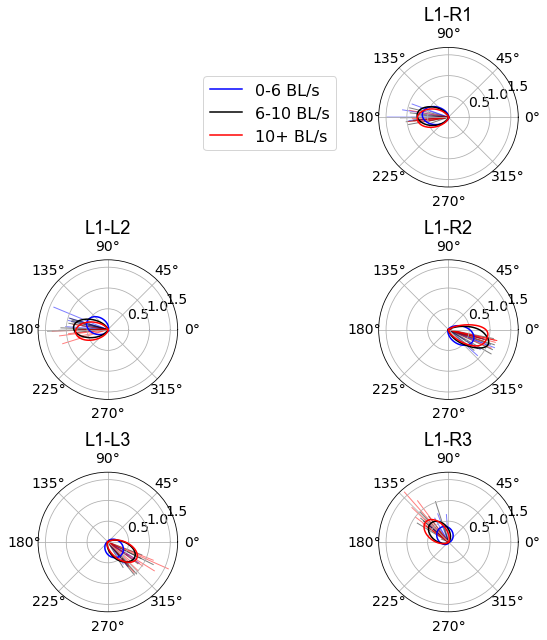

In [49]:
# plot relative phase to L1 - histograms
compare_labels = ['L1-R1', 'L1-R2', 'L1-R3','L1-L2', 'L1-L3']
plt_colors = ['blue', 'black', 'red']
fly_colors =['blue', 'black', 'red'] #['steelblue', 'silver', 'salmon']
plt_axes = [[0,1],[1,1],[2,1],[1,0],[2,0]]
speed_labels = ['0-6 BL/s', '6-10 BL/s', '10+ BL/s']

fig, axs = plt.subplots(3,2, figsize =[8,9], sharex=True, sharey=True, subplot_kw={'projection': 'polar'})
for p in range(phase_dists.shape[0]):
    for j in range(3): # walking speed bins
                
        for fly in range(fly_phase_stats.shape[0]):
            axs[plt_axes[p][0], plt_axes[p][1]].plot(np.array([0, fly_phase_stats[fly,0,p,j]]), np.array([0, fly_phase_stats[fly,1,p,j]]), color = fly_colors[j], linewidth = 1, zorder=1, alpha = 0.5)
        
        # plot distribution
        sea.kdeplot(ax= axs[plt_axes[p][0], plt_axes[p][1]], x=full_phase_dist[p][j], color = plt_colors[j], linewidth = 1.5, zorder=10, label = speed_labels[j], bw_adjust=2) 
        
    # plot parameters
    axs[plt_axes[p][0], plt_axes[p][1]].tick_params(axis='both', labelsize=14)
    axs[plt_axes[p][0], plt_axes[p][1]].set_ylabel(None)
    axs[plt_axes[p][0], plt_axes[p][1]].set_title(compare_labels[p], fontsize=18, fontname="Arial")
    
    if p ==0:
        axs[plt_axes[p][0], plt_axes[p][1]].legend(fontsize = 16, bbox_to_anchor=(-0.25, 0.85))
        
axs[0,0].axis('off')
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + 'L1_relative_phase_full_distribution.png', dpi = 200)
fig.savefig(figure_dir + 'L1_relative_phase_full_distribution.pdf', dpi = 200)

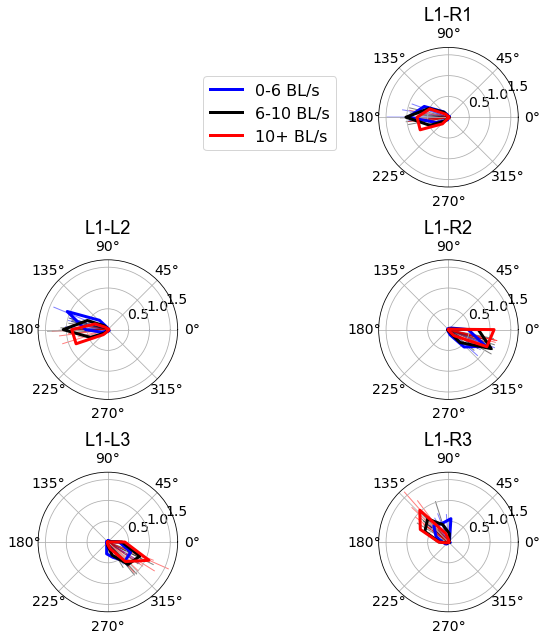

In [11]:
# plot relative phase to L1 - histograms
compare_labels = ['L1-R1', 'L1-R2', 'L1-R3','L1-L2', 'L1-L3']
plt_colors = ['blue', 'black', 'red']
fly_colors =['blue', 'black', 'red'] #['steelblue', 'silver', 'salmon']
plt_axes = [[0,1],[1,1],[2,1],[1,0],[2,0]]
speed_labels = ['0-6 BL/s', '6-10 BL/s', '10+ BL/s']

fig, axs = plt.subplots(3,2, figsize =[8,9], sharex=True, sharey=True, subplot_kw={'projection': 'polar'})
for p in range(phase_dists.shape[0]):
    for j in range(3): # walking speed bins
                
        for fly in range(fly_phase_stats.shape[0]):
            axs[plt_axes[p][0], plt_axes[p][1]].plot(np.array([0, fly_phase_stats[fly,0,p,j]]), np.array([0, fly_phase_stats[fly,1,p,j]]), color = fly_colors[j], linewidth = 1, zorder=1, alpha = 0.5)
        
        # plot distribution
        axs[plt_axes[p][0], plt_axes[p][1]].plot(phase_dists[p,:,1,j], phase_dists[p,:,0,j], color = plt_colors[j], linewidth = 3, zorder=10, label = speed_labels[j])
        
    # plot parameters
    axs[plt_axes[p][0], plt_axes[p][1]].tick_params(axis='both', labelsize=14)
    axs[plt_axes[p][0], plt_axes[p][1]].set_title(compare_labels[p], fontsize=18, fontname="Arial")
    
    if p ==0:
        axs[plt_axes[p][0], plt_axes[p][1]].legend(fontsize = 16, bbox_to_anchor=(-0.25, 0.85))
        
axs[0,0].axis('off')
plt.tight_layout()
plt.show()

fig.savefig(figure_dir + 'L1_relative_phase.png', dpi = 200)
fig.savefig(figure_dir + 'L1_relative_phase.pdf', dpi = 200)